## Importing libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

from scipy import stats
from scipy.stats import chi2_contingency

from sklearn.preprocessing import LabelEncoder, StandardScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, plot_confusion_matrix

from matplotlib.colors import ListedColormap

plt.rcParams['figure.figsize'] = [12, 5]

from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

#from xgboost import XGBClassifier

pd.options.display.float_format = '{:.2f}'.format

## Reading the Dataframe

In [9]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

#### Churn is the target variable.

In [4]:
df.Churn.unique()

array(['No', 'Yes'], dtype=object)


### Data types

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### TotalCharges is wrongly identified as object. Convert it into float.

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

df.TotalCharges.dtype

dtype('float64')

#### Convert SeniorCitizen to categorical

In [7]:
df["SeniorCitizen"].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [8]:
df["SeniorCitizen"] = df["SeniorCitizen"].astype("O")

In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Five Point Summary of the data

In [10]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.00,7043.00,7032.00
mean,32.37,64.76,2283.30
std,24.56,30.09,2266.77
min,0.00,18.25,18.80
25%,9.00,35.50,401.45
50%,29.00,70.35,1397.47
75%,55.00,89.85,3794.74
max,72.00,118.75,8684.80


### Missing Values Detection

In [11]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## Missing Value Treatment

### Total Charges has missing values detected

In [12]:
df.tenure.skew() # negative skewed

0.2395397495619829

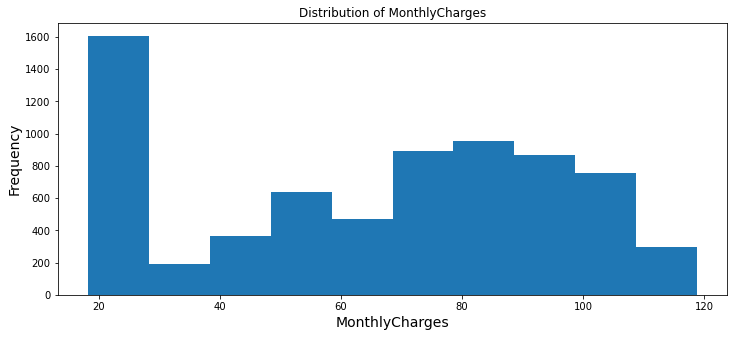

In [13]:
# Histogram of Total Charges
plt.title('Distribution of MonthlyCharges')
plt.hist(df["MonthlyCharges"])
plt.xlabel('MonthlyCharges', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.show()

In [14]:
# Since the Total Charges is right skewed, we will fill the missing values with the median of Total Charges.

df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Outlier Detection

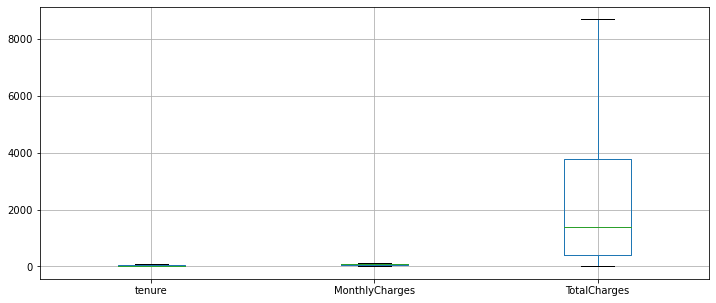

In [15]:
# Boxplot to detect outliers

df.boxplot()
plt.show()

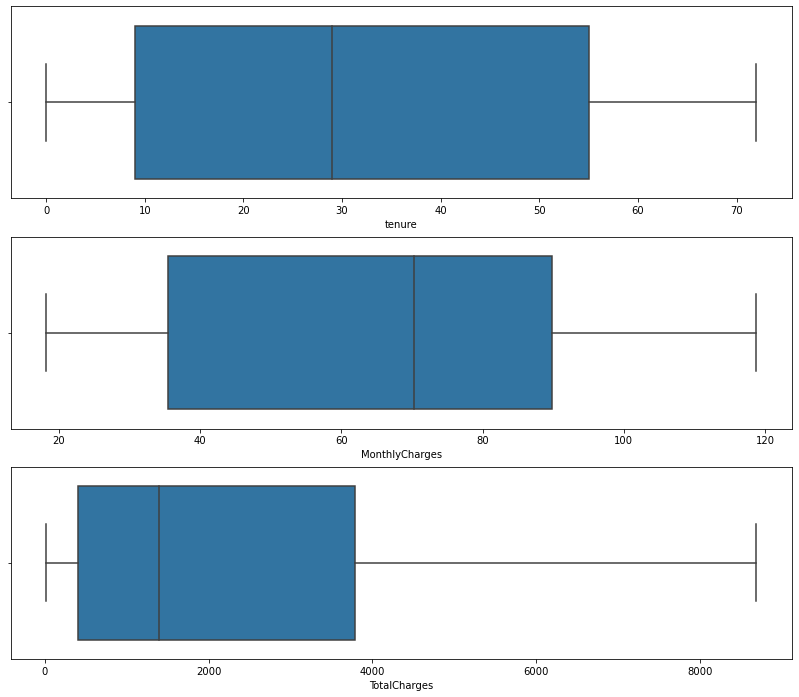

In [16]:
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (14,12))

for variable, subplot in zip(df.select_dtypes(np.number), ax.flatten()):
    sns.boxplot(df[variable], ax = subplot)    
plt.show()


#### There are no outliers in the data.

### Check if data is imbalanced

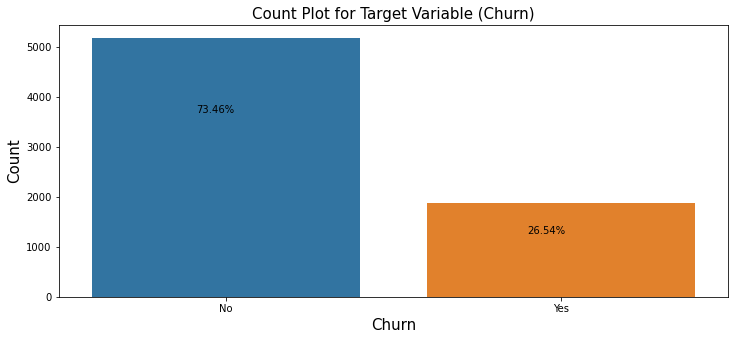

In [17]:
sns.countplot(df["Churn"])

plt.text(x = -0.09, y = df["Churn"].value_counts()[0] - 1500, s = str(round((df["Churn"].value_counts()[0])*100/len(df["Churn"]),2)) + '%')
plt.text(x = 0.90, y = df["Churn"].value_counts()[1] - 600, s = str(round((df["Churn"].value_counts()[1])*100/len(df["Churn"]),2)) + '%')

plt.title('Count Plot for Target Variable (Churn)', fontsize = 15)
plt.xlabel('Churn', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

From the above countplot we can see that the the target variable Churn is slightly imbalanced.

## Univariate Analysis

### 1. customerID

We can drop the customerID column as it will not help us in the analysis.

In [18]:
df = df.drop('customerID', axis = 1)
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### 2. Gender

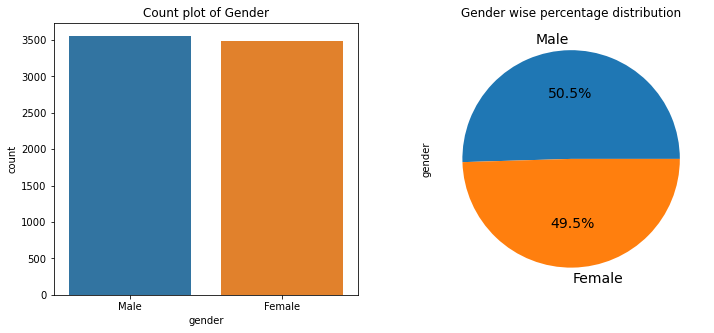

In [19]:
plt.subplot(1, 2, 1)
plt.title('Count plot of Gender')
sns.countplot(x = df.gender, order = ['Male', 'Female'])

plt.subplot(1, 2, 2)
plt.title('Gender wise percentage distribution')
df['gender'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', fontsize = 14)

plt.show()

The above graph shows that there are 49.5 % female customers and 50.5 % male customers.

### 3. Senior citizen

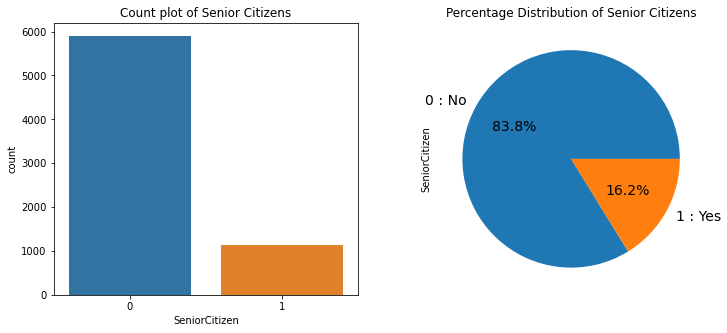

In [20]:
plt.subplot(1, 2, 1)
plt.title('Count plot of Senior Citizens')
sns.countplot(x = df.SeniorCitizen)

plt.subplot(1, 2, 2)
plt.title('Percentage Distribution of Senior Citizens')
df['SeniorCitizen'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', fontsize = 14, 
                                        labels = ['0 : No', '1 : Yes'])

plt.show()

It can be observed that the fraction of senior citizen is very less.
(Youngsters are approximately five times the senior citizens)

### 4. Partner

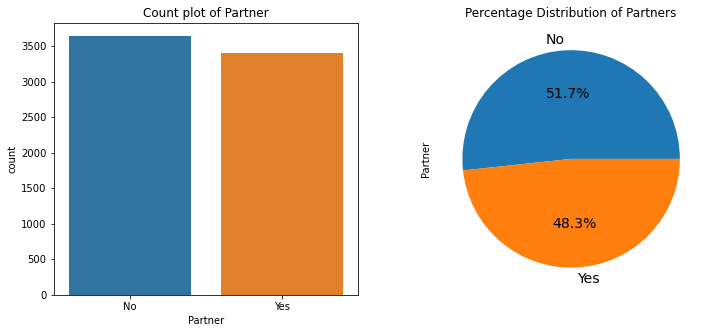

In [21]:
plt.subplot(1, 2, 1)
plt.title('Count plot of Partner')
sns.countplot(x = df.Partner, order = ['No', 'Yes'])

plt.subplot(1, 2, 2)
plt.title('Percentage Distribution of Partners')
df['Partner'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', fontsize = 14)

plt.show()

The above graph shows that 48.3 % of customers have partner whereas 51.7% do not have partner.

### 5. Dependents

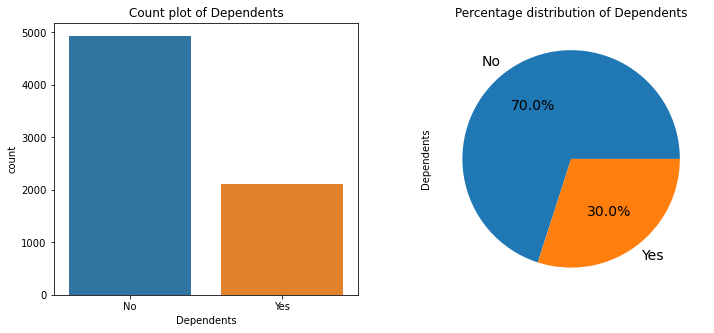

In [22]:
plt.subplot(1, 2, 1)
plt.title('Count plot of Dependents')
sns.countplot(x = df.Dependents)

plt.subplot(1, 2, 2)
plt.title('Percentage distribution of Dependents')
df['Dependents'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', fontsize = 14)
plt.show()

### 6. Tenure

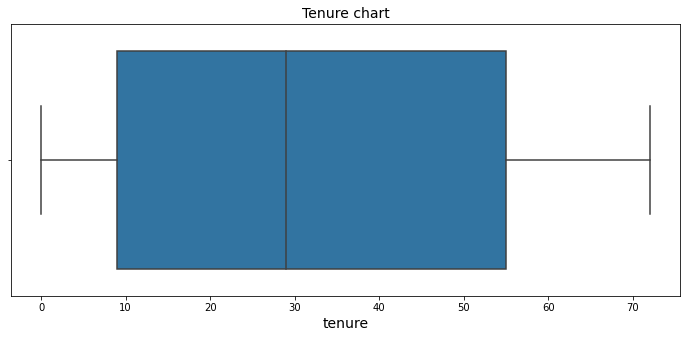

In [23]:
plt.title("Tenure chart", fontsize = 14)
plt.xlabel("Tenure", fontsize = 14)
sns.boxplot(x = df.tenure)
plt.show()

###  7. PhoneService

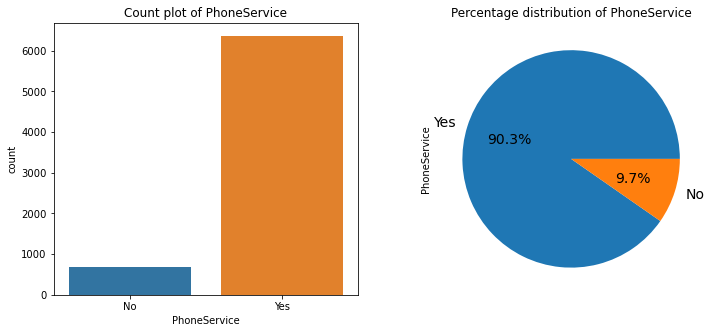

In [24]:
plt.subplot(1, 2, 1)
plt.title('Count plot of PhoneService')
sns.countplot(x = df.PhoneService)

plt.subplot(1, 2, 2)
plt.title('Percentage distribution of PhoneService')
df['PhoneService'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', fontsize = 14)
plt.show()

### 8. MultipleLines

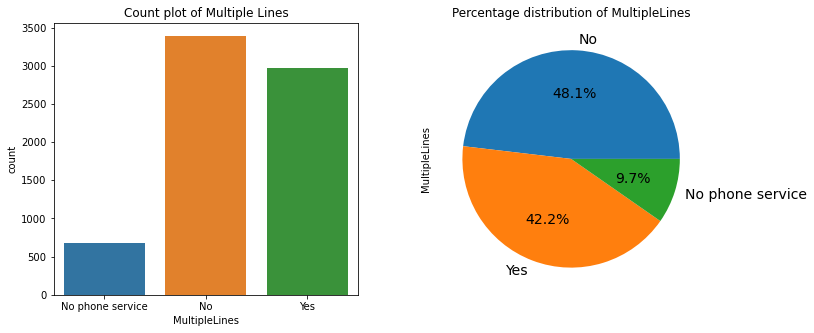

In [25]:
plt.subplot(1, 2, 1)
plt.title('Count plot of Multiple Lines')
sns.countplot(x = df.MultipleLines)

plt.subplot(1, 2, 2)
plt.title('Percentage distribution of MultipleLines')
df['MultipleLines'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', fontsize = 14)
plt.show()

### 9. InternetService

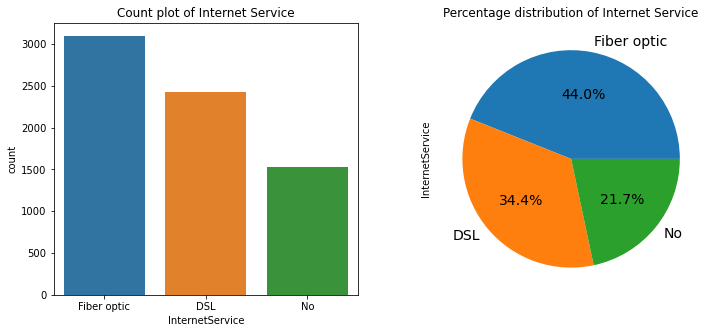

In [26]:
plt.subplot(1, 2, 1)
plt.title('Count plot of Internet Service')
sns.countplot(x = df.InternetService, order = ['Fiber optic', 'DSL', 'No'])

plt.subplot(1, 2, 2)
plt.title('Percentage distribution of Internet Service')
df['InternetService'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', fontsize = 14)
plt.show()

Maximum number of customers use Fiber Optic Internet service.

44 % of the customers use Fiber Optic Internet Service.

34.4 % of the customers use DSL.

### 10. OnlineSecurity

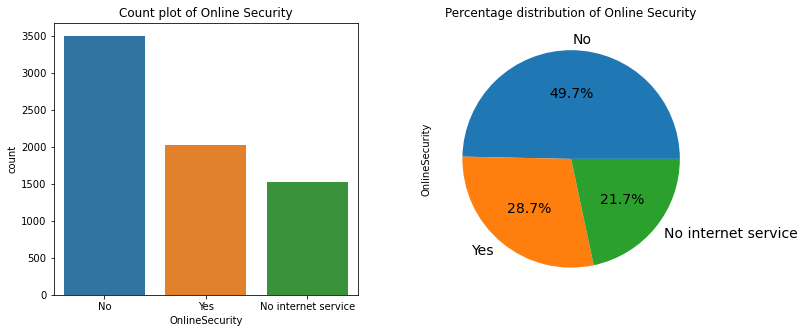

In [27]:
plt.subplot(1, 2, 1)
plt.title('Count plot of Online Security')
sns.countplot(x = df.OnlineSecurity, order = ['No', 'Yes', 'No internet service'])

plt.subplot(1, 2, 2)
plt.title('Percentage distribution of Online Security')
df['OnlineSecurity'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', fontsize = 14)
plt.show()

49.7 % of the customers do not have Online Security.

28.7 % of the customers have Online Security.

### 11. OnlineBackup

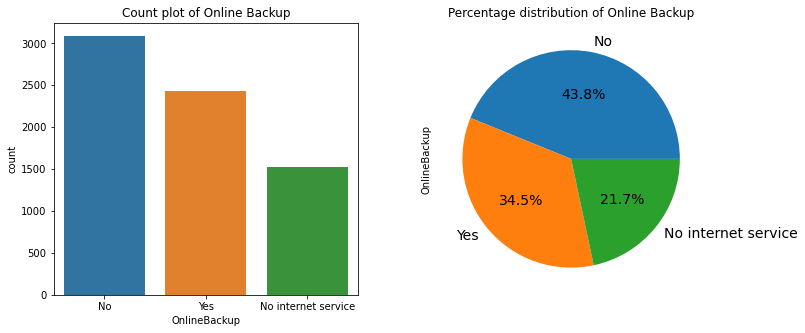

In [28]:
plt.subplot(1, 2, 1)
plt.title('Count plot of Online Backup')
sns.countplot(x = df.OnlineBackup, order = ['No', 'Yes', 'No internet service'])

plt.subplot(1, 2, 2)
plt.title('Percentage distribution of Online Backup')
df['OnlineBackup'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', fontsize = 14)
plt.show()

43.8 % of the customers do not have Online Backup.

34.5 % of the customers have Online Backup.

### 12. DeviceProtection

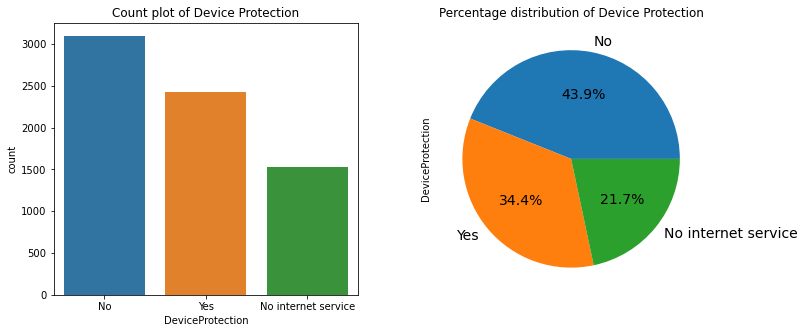

In [29]:
plt.subplot(1, 2, 1)
plt.title('Count plot of Device Protection')
sns.countplot(x = df.DeviceProtection, order = ['No', 'Yes', 'No internet service'])

plt.subplot(1, 2, 2)
plt.title('Percentage distribution of Device Protection')
df['DeviceProtection'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', fontsize = 14, sort_columns = False)
plt.show()

43.9 % of the customers do not have Device Protection.

34.4 % of the customers have Device Protection.

### 13. Tech support

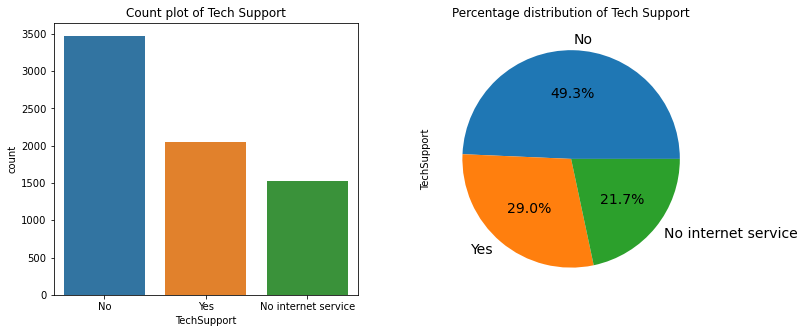

In [30]:
plt.subplot(1, 2, 1)
plt.title("Count plot of Tech Support")
sns.countplot(x = df["TechSupport"])

plt.subplot(1, 2, 2)
plt.title("Percentage distribution of Tech Support")
df["TechSupport"].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', fontsize = 14)
plt.show()

49.3 % of the customers have not opted for Tech support.

### 14. StreamingTV

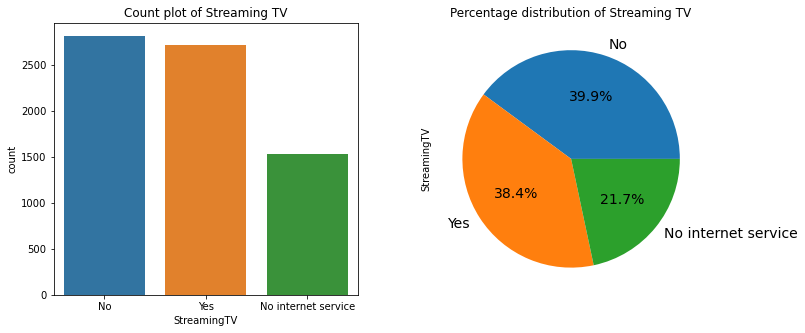

In [31]:
plt.subplot(1, 2, 1)
plt.title("Count plot of Streaming TV")
sns.countplot(x = df["StreamingTV"])

plt.subplot(1, 2, 2)
plt.title("Percentage distribution of Streaming TV")
df["StreamingTV"].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', fontsize = 14)

plt.show()

39.9 % of the customers have not opted for Streaming TV service.

### 15. StreamingMovies

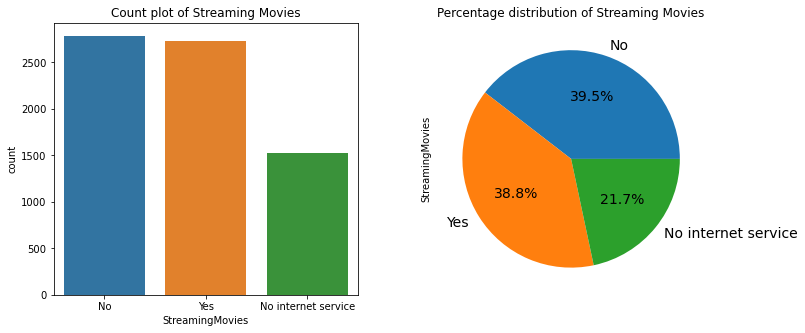

In [32]:
plt.subplot(1, 2, 1)
plt.title("Count plot of Streaming Movies")
sns.countplot(x = df["StreamingMovies"])

plt.subplot(1, 2, 2)
plt.title("Percentage distribution of Streaming Movies")
df["StreamingMovies"].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', fontsize = 14)

plt.show()

39.5 % of the customers have not opted for Streaming Movies service.

### 16. Contract

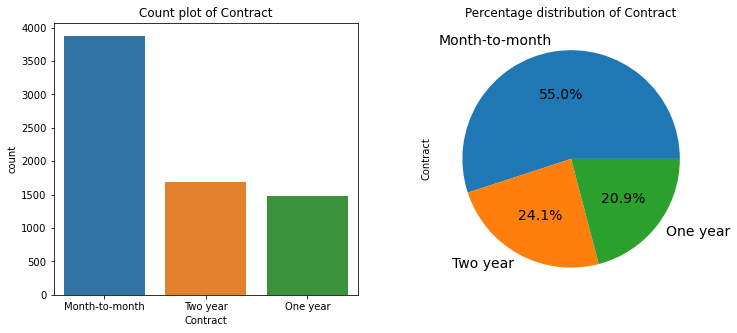

In [33]:
plt.subplot(1, 2, 1)
plt.title("Count plot of Contract")
sns.countplot(x = df["Contract"], order = ['Month-to-month', 'Two year', 'One year'])

plt.subplot(1, 2, 2)
plt.title("Percentage distribution of Contract")
df["Contract"].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', fontsize = 14)

plt.show()

The above graph tells about the contract term of the customer (Month-to-month, One year, Two year).

55 % of the customers have a month-to-month contract.

### 17. PaperlessBilling

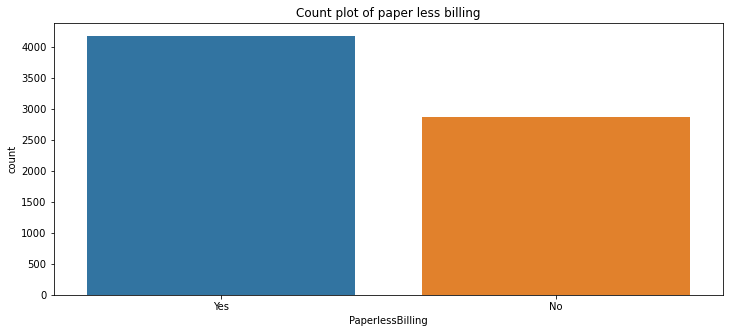

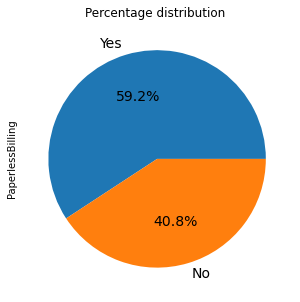

In [34]:
plt.title('Count plot of paper less billing')
sns.countplot(x = df.PaperlessBilling)
plt.show()
plt.subplot(1, 2, 2)
plt.title('Percentage distribution ')
df['PaperlessBilling'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', fontsize = 14)
plt.show()

In the above graph 59.2% people churn in paperless billing.

40.89% people don't churn.

### 18. Payment Method

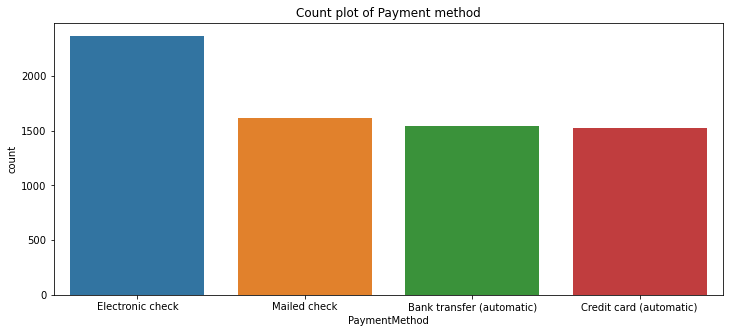

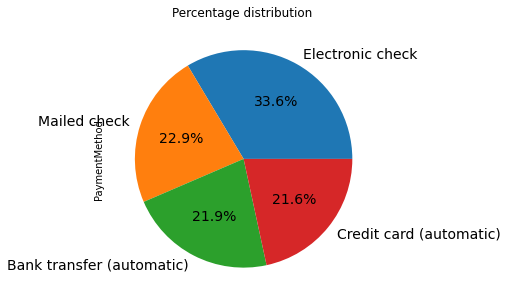

In [35]:
plt.title('Count plot of Payment method')
sns.countplot(x = df.PaymentMethod)
plt.show()
plt.subplot(1, 2, 2)
plt.title('Percentage distribution ')
df['PaymentMethod'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', fontsize = 14)
plt.show()

In the above graph Electronic check is more with 33.6%.

Bank transfer and credit payment are almost same

### 19.MonthlyCharges

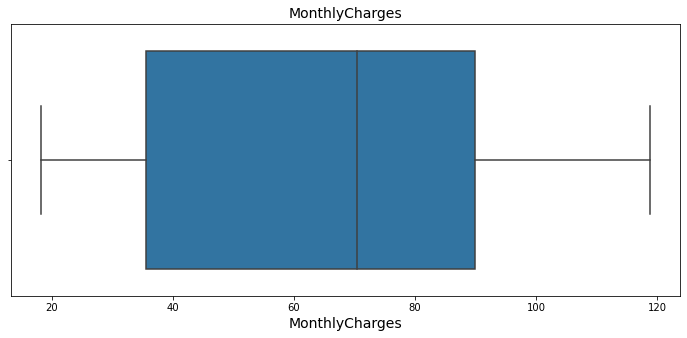

In [36]:
plt.title("MonthlyCharges", fontsize = 14)
plt.xlabel("MonthlyCharges", fontsize = 14)
sns.boxplot(x = df.MonthlyCharges)
plt.show()

The average monthly charges lies in range between 70 and 80

Lesser the monthly charges denotes less churn factor.

### 20. TotalCharges

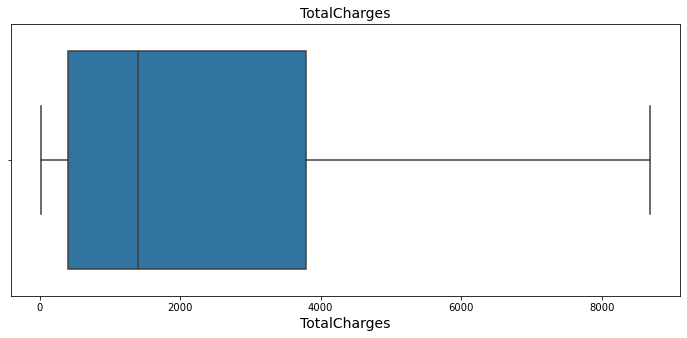

In [37]:
plt.title("TotalCharges", fontsize = 14)
plt.xlabel("TotalCharges", fontsize = 14)
sns.boxplot(x = df.TotalCharges)
plt.show()

The highest total charges range from 3000 to 4000

More people churn in range 2000 to 3000.

### 21. Churn

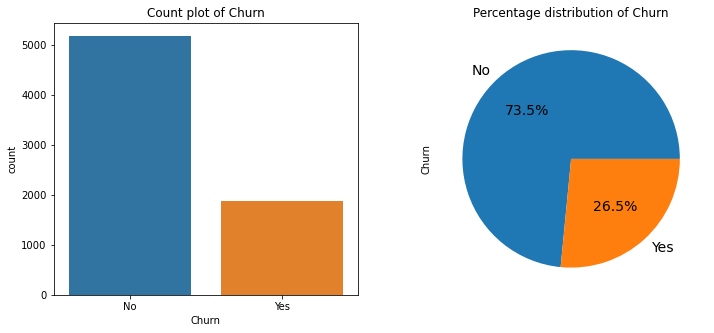

In [38]:
plt.subplot(1, 2, 1)
plt.title('Count plot of Churn')
sns.countplot(x = df.Churn)

plt.subplot(1, 2, 2)
plt.title('Percentage distribution of Churn')
df['Churn'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', fontsize = 14)
plt.show()

Churn is slightly imbalanced.

73.5% of the customers churned.

26.5% of the customers did not churn.

## Bivariate Analysis

### 1. Gender vs Churn

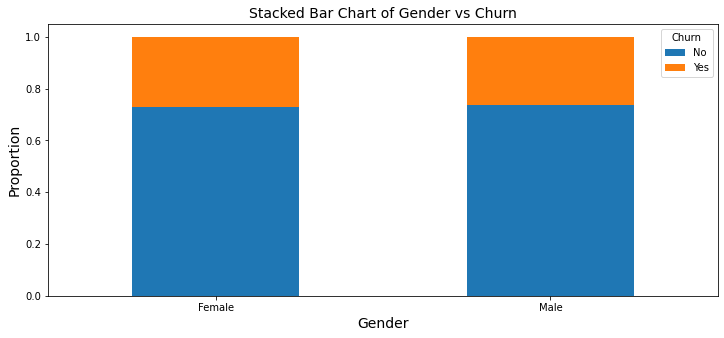

In [39]:
pd.crosstab(df.gender, df.Churn, normalize = 'index').plot(kind = 'bar', stacked = True)

plt.title('Stacked Bar Chart of Gender vs Churn', fontsize = 14)
plt.xlabel('Gender', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)

plt.xticks(rotation = 'horizontal')
plt.show()

26.5 % of the customers switched to another firm.

Both genders behaved in similar fashion when it comes to migrating to another service provider.

### 2. Senior Citizen vs Churn

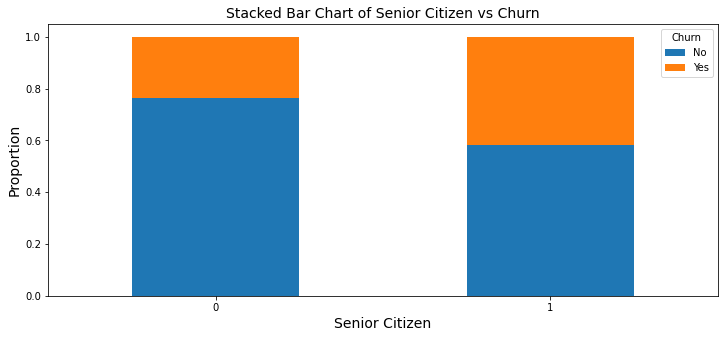

In [40]:
pd.crosstab(df.SeniorCitizen, df.Churn, normalize = 'index').plot(kind = 'bar', stacked = True)

plt.title('Stacked Bar Chart of Senior Citizen vs Churn', fontsize = 14)
plt.xlabel('Senior Citizen', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)

plt.xticks(rotation = 'horizontal')
plt.show()

Most of the senior citizens churn whereas only few youngsters switched to another service provider.

### 3. Partner vs Churn

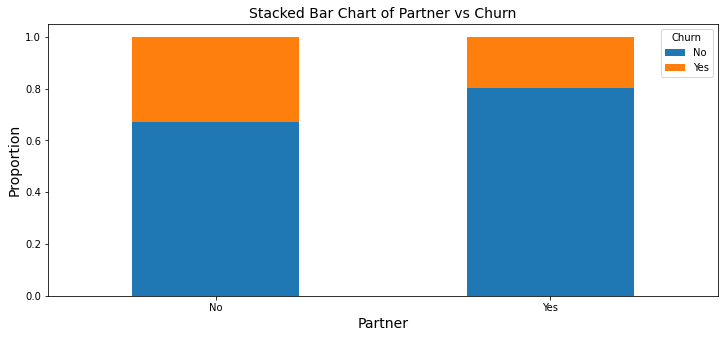

In [41]:
pd.crosstab(df.Partner, df.Churn, normalize = 'index').plot(kind = 'bar', stacked = True)

plt.title('Stacked Bar Chart of Partner vs Churn', fontsize = 14)
plt.xlabel('Partner', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)

plt.xticks(rotation = 'horizontal')
plt.show()

Customers who don't have partners are more likely to churn. Almost 50% of them switched to another service provider.

Only one-fourth of the customers who have partners churned.

### 4. Dependents vs Churn

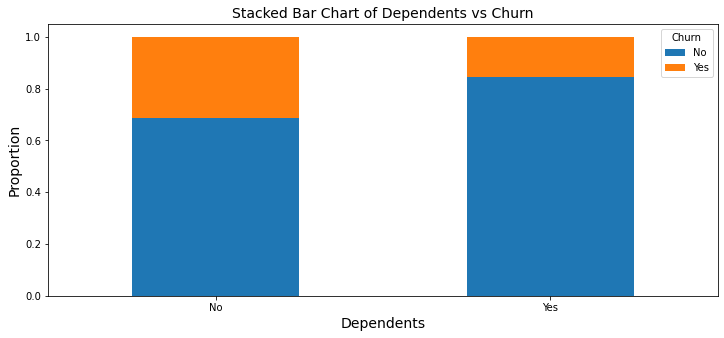

In [42]:
pd.crosstab(df.Dependents, df.Churn, normalize = 'index').plot(kind = 'bar', stacked = True)

plt.title('Stacked Bar Chart of Dependents vs Churn', fontsize = 14)
plt.xlabel('Dependents', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)

plt.xticks(rotation = 'horizontal')
plt.show()

Customers who have dependents are churning less compared to customers who don't have dependents.

### 5. tenure vs Churn

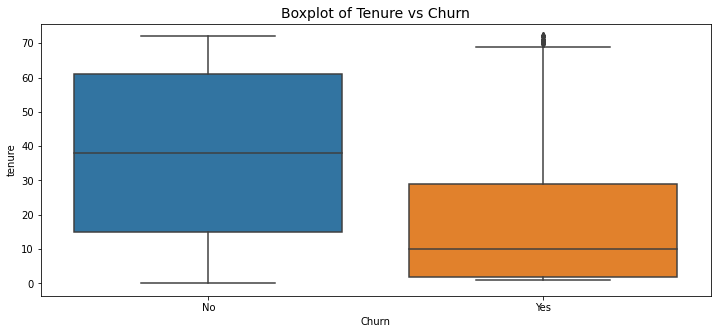

In [43]:
sns.boxplot(x = df.Churn , y = df.tenure , orient = 'v')
plt.title("Boxplot of Tenure vs Churn", fontsize = 14)
plt.show()

From this boxplot between tenure and churn columns, we infer that people having tenure less than 30 are churning frequently.

### 6. PhoneService vs Churn

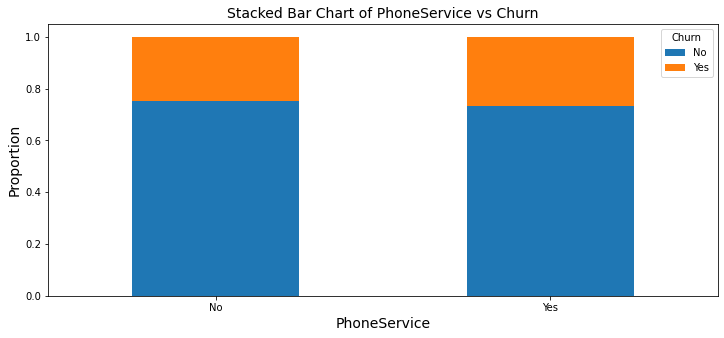

In [44]:
pd.crosstab(df["PhoneService"], df["Churn"], normalize = 'index').plot(kind = "bar", stacked = True)
plt.title("Stacked Bar Chart of PhoneService vs Churn", fontsize = 14)
plt.xlabel("PhoneService", fontsize = 14)
plt.ylabel("Proportion", fontsize = 14)
plt.xticks(rotation = "horizontal")
plt.show()

From this countplot bivariate analysis, we can conclude that people having phone service are churning quite frequently than those who don't have.

### 7.MultipleLines vs Churn

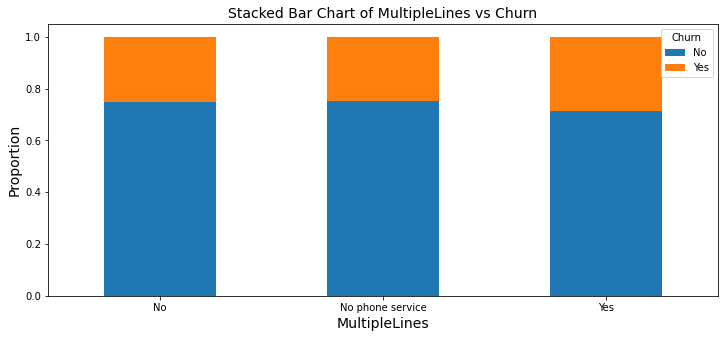

In [45]:
pd.crosstab(df["MultipleLines"], df["Churn"], normalize = 'index').plot(kind = "bar", stacked = True)
plt.title("Stacked Bar Chart of MultipleLines vs Churn", fontsize = 14)
plt.xlabel("MultipleLines", fontsize = 14)
plt.ylabel("Proportion", fontsize = 14)
plt.xticks(rotation = "horizontal")
plt.show()

From this graph, we infer that the people are churning irrespective of having multiple lines or not. However, churn is least in case of no phone service.

### 8. InternetService vs Churn

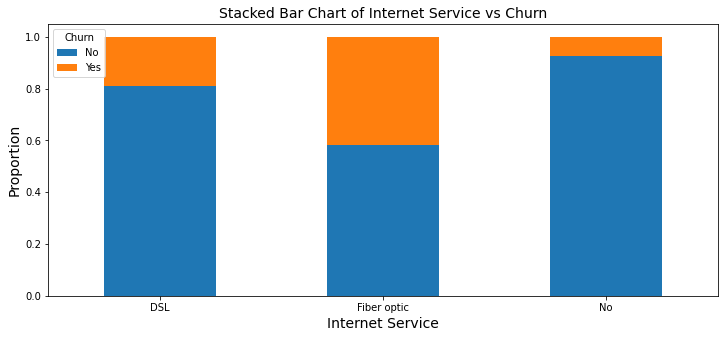

In [46]:
pd.crosstab(df.InternetService, df.Churn, normalize = 'index').plot(kind = 'bar', stacked = True)

plt.title('Stacked Bar Chart of Internet Service vs Churn', fontsize = 14)
plt.xlabel('Internet Service', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)

plt.xticks(rotation = 'horizontal')
plt.show()

Customers are less likely to churn if InternetService is DSL.

Customers are more likely to churn if InternetService is Fiber optic.

### 9. OnlineSecurity vs Churn

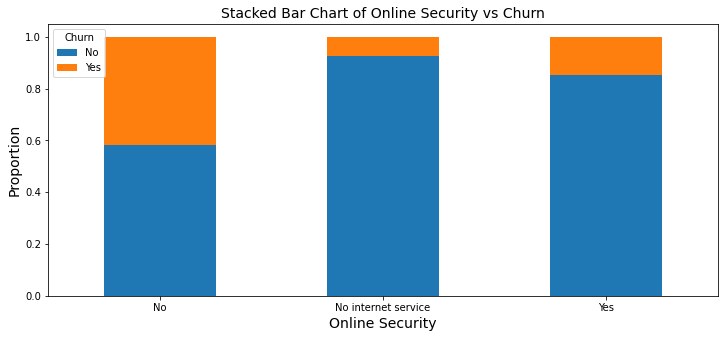

In [47]:
pd.crosstab(df.OnlineSecurity, df.Churn, normalize = 'index').plot(kind = 'bar', stacked = True)

plt.title('Stacked Bar Chart of Online Security vs Churn', fontsize = 14)
plt.xlabel('Online Security', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)

plt.xticks(rotation = 'horizontal')
plt.show()

Customers churn more if Online Security is not provided.

Customers are less likely to churn if Online Security is provided.

### 10. OnlineBackup vs Churn

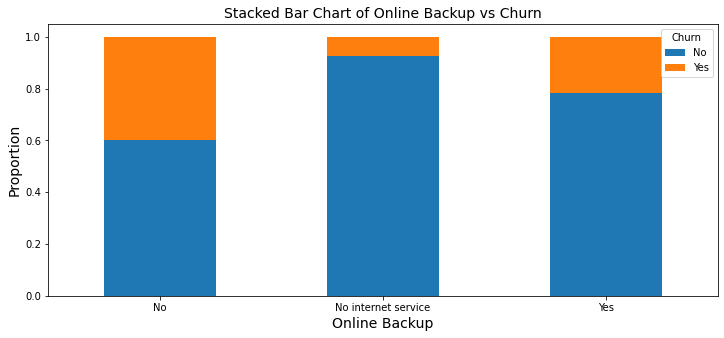

In [48]:
pd.crosstab(df.OnlineBackup, df.Churn, normalize = 'index').plot(kind = 'bar', stacked = True)

plt.title('Stacked Bar Chart of Online Backup vs Churn', fontsize = 14)
plt.xlabel('Online Backup', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)

plt.xticks(rotation = 'horizontal')
plt.show()

Customers are less likely to Churn if Online Backup is provided.

Customers churn more if Online Backup is not provided.

### 11. DeviceProtection vs Churn

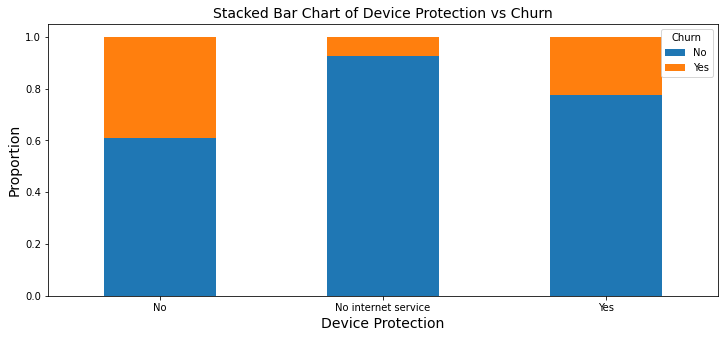

In [49]:
pd.crosstab(df.DeviceProtection, df.Churn, normalize = 'index').plot(kind = 'bar', stacked = True)

plt.title('Stacked Bar Chart of Device Protection vs Churn', fontsize = 14)
plt.xlabel('Device Protection', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)

plt.xticks(rotation = 'horizontal')
plt.show()

Customers churn more if Device Protection is not provided.

Customers are less likely to churn if Device Protection is provided.

### 12. TechSupport vs Churn

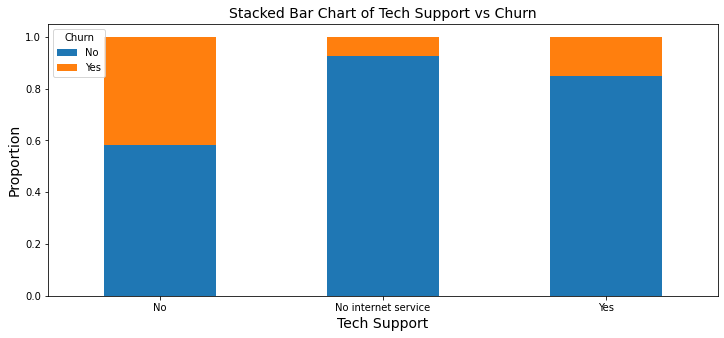

In [50]:
pd.crosstab(df["TechSupport"], df["Churn"], normalize = 'index').plot(kind = "bar", stacked = True)
plt.title("Stacked Bar Chart of Tech Support vs Churn", fontsize = 14)
plt.xlabel("Tech Support", fontsize = 14)
plt.ylabel("Proportion", fontsize = 14)
plt.xticks(rotation = "horizontal")
plt.show()

The churn is higher for customers with no Tech Support.

The churn is lowest for customers with no internet service.

### 13. StreamingTV vs Churn

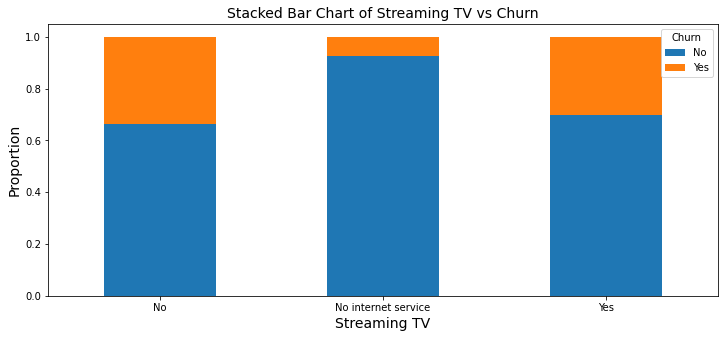

In [51]:
pd.crosstab(df["StreamingTV"], df["Churn"], normalize = 'index').plot(kind = "bar", stacked = True)
plt.title("Stacked Bar Chart of Streaming TV vs Churn", fontsize = 14)
plt.xlabel("Streaming TV", fontsize = 14)
plt.ylabel("Proportion", fontsize = 14)
plt.xticks(rotation = "horizontal")
plt.show()

Customers with Streaming TV and without Streaming TV service have approximately the same churn.

The churn is lowest for customers with no internet service.

### 14. StreamingMovies vs Churn

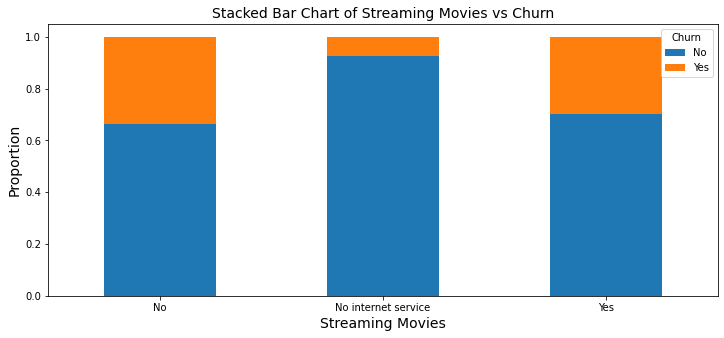

In [52]:
pd.crosstab(df["StreamingMovies"], df["Churn"], normalize = 'index').plot(kind = "bar", stacked = True)
plt.title("Stacked Bar Chart of Streaming Movies vs Churn", fontsize = 14)
plt.xlabel("Streaming Movies", fontsize = 14)
plt.ylabel("Proportion", fontsize = 14)
plt.xticks(rotation = "horizontal")
plt.show()

Customers with Streaming Movies and without Streaming Movies service have approximately the same churn.

The churn is lowest for customers with no internet service.

### 15. Contract vs Churn

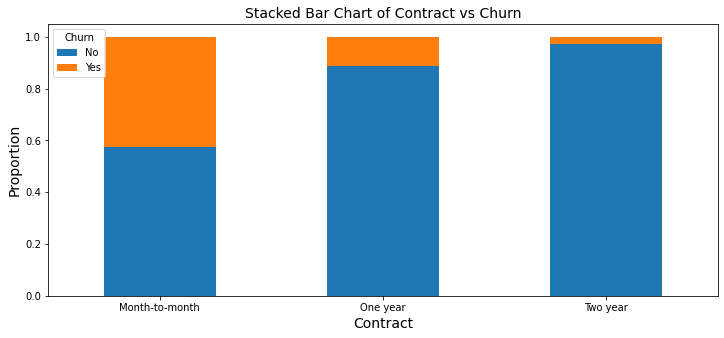

In [53]:
pd.crosstab(df["Contract"], df["Churn"], normalize = 'index').plot(kind = "bar", stacked = True)
plt.title("Stacked Bar Chart of Contract vs Churn", fontsize = 14)
plt.xlabel("Contract", fontsize = 14)
plt.ylabel("Proportion", fontsize = 14)
plt.xticks(rotation = "horizontal")
plt.show()

Customers with Month-to-Month contract have the highest churn.

Customers with termed contract churn the least.

### 16. PaperlessBilling vs Churn

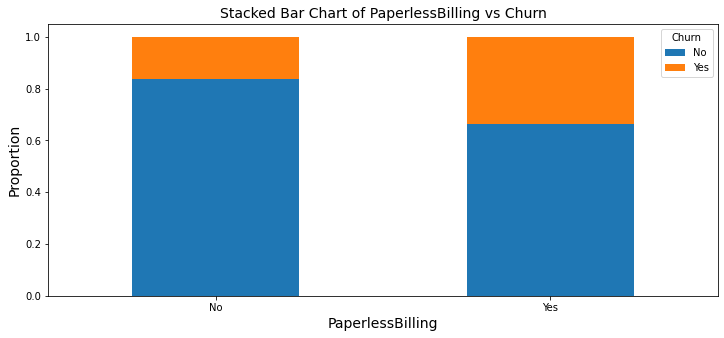

In [54]:
pd.crosstab(df["PaperlessBilling"], df["Churn"], normalize = 'index').plot(kind = "bar", stacked = True)
plt.title("Stacked Bar Chart of PaperlessBilling vs Churn", fontsize = 14)
plt.xlabel("PaperlessBilling", fontsize = 14)
plt.ylabel("Proportion", fontsize = 14)
plt.xticks(rotation = "horizontal")
plt.show()

Electronic check custmers tend to churn more than other customers as they are easy to cancel than other options

other payment methods churn rate are less than the mean value

Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.

### 17. PaymentMethod vs Churn

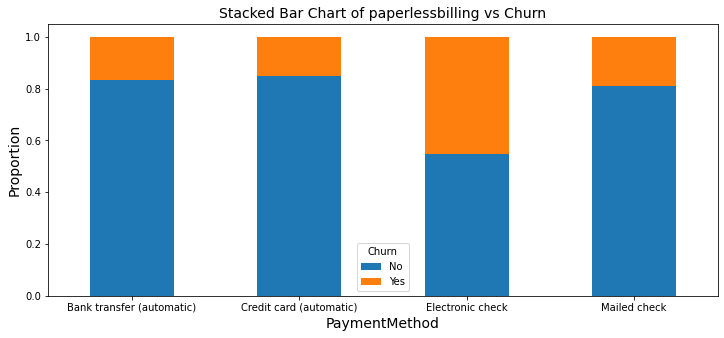

In [55]:
pd.crosstab(df["PaymentMethod"], df["Churn"], normalize = 'index').plot(kind = "bar", stacked = True)
plt.title("Stacked Bar Chart of paperlessbilling vs Churn", fontsize = 14)
plt.xlabel("PaymentMethod", fontsize = 14)
plt.ylabel("Proportion", fontsize = 14)
plt.xticks(rotation = "horizontal")
plt.show()

Electronic check custmers tend to churn more than other customers as they are easy to cancel than other options

other payment methods churn rate are less than the mean value

Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.

### 18. MonthlyCharges vs Churn

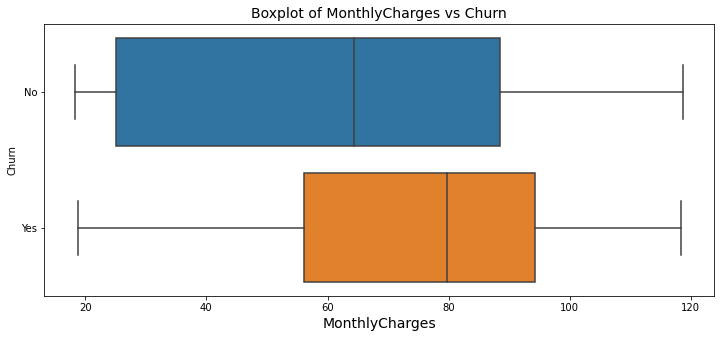

In [56]:
sns.boxplot(x = df.MonthlyCharges , y = df.Churn)
plt.title("Boxplot of MonthlyCharges vs Churn", fontsize = 14)
plt.xlabel("MonthlyCharges", fontsize = 14)
plt.show()

The monthly charges churn more between range20-30

The churn rate is less in range 40 compared to others

### 19. TotalCharges vs Churn

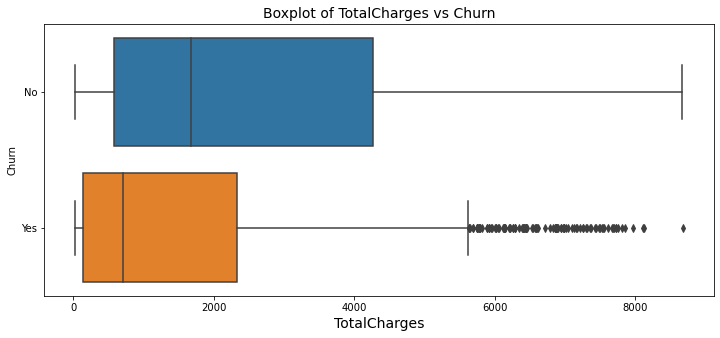

In [57]:
sns.boxplot(x = df.TotalCharges , y = df.Churn)
plt.title("Boxplot of TotalCharges vs Churn", fontsize = 14)
plt.xlabel("TotalCharges", fontsize = 14)
plt.show()

The total charge in range 2000 to 4000 churn more

People churn more in range less than 2000



## Encoding

In [58]:
# df_cat -> df for categorical variables
df_cat = df.drop(["tenure", "MonthlyCharges", "TotalCharges"], axis = 1)

def object_to_int(df_series):
    df_series = LabelEncoder().fit_transform(df_series)
    return df_series

# Applying the function to the df containing only categorical columns.

df_encoded = df_cat.apply(lambda x : object_to_int(x))
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


## Feature Scaling

In [59]:
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

# Using Standard Scaler

se = StandardScaler()

# Scale the numeric columns
scaled_cols = se.fit_transform(df[num_cols])

scaled_cols_df = pd.DataFrame(scaled_cols, columns = num_cols)

# Concatenating the encoded df and scaled df
df_scaled = pd.concat([df_encoded, scaled_cols_df], axis = 1)

# Scaled and encoded df
df_scaled.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,-1.28,-1.16,-0.99
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,0.07,-0.26,-0.17
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,-1.24,-0.36,-0.96
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,0.51,-0.75,-0.19
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,-1.24,0.20,-0.94


## Multicollinearity

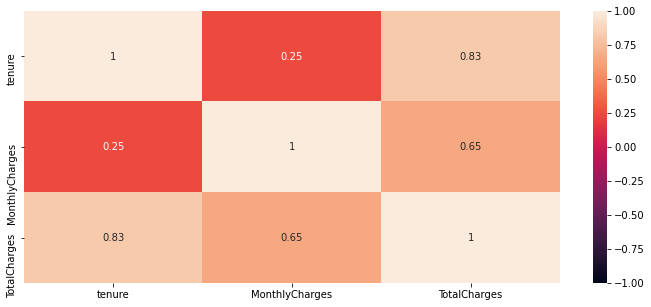

In [60]:
sns.heatmap(scaled_cols_df.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

The above graph shows high correlation between tenure and total charges.

Also, there is high correlation between monthly charges and total charges.

### Variance Inflation Factor

In [61]:
vif = [variance_inflation_factor(df[num_cols].values, i) for i in range(df[num_cols].shape[1])]
vif_df = pd.DataFrame({"VIF" : vif, "Features" : df[num_cols].columns})
vif_df

,VIF,Features
0,6.32,tenure
1,3.36,MonthlyCharges
2,8.07,TotalCharges


VIF is greater than 5 for tenure and TotalCharges. Hence there is high correlation.

## Hypothesis Formulation and Validation
### Assuming alpha = 0.05

### 1. Gender

#### The null and alternate hypothesis is:

H0: Customer Churn is independent of gender of customers.

H1: Churn is lower for customers whose gender is male.

In [62]:
tab = pd.crosstab(df.gender, df.Churn)
tab

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [63]:
chi_sq_Stat, p_val, dof, exp_freq = stats.chi2_contingency(tab.values)
p_val

0.48657873605618596

Since p_val > alpha, we failed to reject the Null Hypothesis.

Therefore, we can conclude that Churn is independent of Gender.

### 2. Senior Citizen

#### The null and alternate hypothesis is:

H0: Customer Churn is independent of senior citizen or not.

H1: Churn is lower for customers who are senior citizens.

In [64]:
tab = pd.crosstab(df.SeniorCitizen, df.Churn)
tab

Churn,No,Yes
SeniorCitizen,,
0,4508,1393
1,666,476


In [65]:
chi_sq_Stat, p_val, dof, exp_freq = stats.chi2_contingency(tab.values)
p_val

1.510066805092378e-36

Since p_val < alpha, we reject the Null Hypothesis.

Therefore, we can conclude that Churn is dependent on whether customer is Senior Citizen or not.

### 3. Partner

#### The null and alternate hypothesis is:

H0: Customer Churn is independent of the partner of customers.

H1: Churn is higher for customers who don't have a partner.

In [66]:
tab = pd.crosstab(df.Partner, df.Churn)
tab

Churn,No,Yes
Partner,,
No,2441,1200
Yes,2733,669


Since p_val < alpha, we reject the Null Hypothesis.

Therefore, we can conclude that Churn is dependent on whether customer has Partner or not.

### 4. Dependents

#### The null and alternate hypothesis is:

H0: Customer Churn is independent of the number of dependents.

H1: Churn is higher for customers having no dependents.

In [67]:
table = pd.crosstab(df["Churn"], df["Dependents"])
table

Dependents,No,Yes
Churn,,
No,3390,1784
Yes,1543,326


In [68]:
chi_2, p_val, dof, expected = chi2_contingency(table.values)
print("p-value:", p_val)

p-value: 4.9249216612154196e-43


In [69]:
# p_value is less than alpha= 0.05
#Thus we reject the null hypothesis

### 5. Tenure

#### The null and alternate hypothesis is:

H0: Customer Churn is independent of the duration of the tenure.

H1: Churn is higher for Customers having tenure less than 30.

In [70]:
import numpy as np

group1 = np.array(df[df['Churn'] == 'Yes']['tenure'])
group2 = np.array(df[df['Churn'] == 'No']['tenure'])

In [71]:
#find variance for each group
print(np.var(group1), np.var(group2))

381.2606667714428 581.361842403119


In [72]:
581.361842403119/381.2606667714428

1.5248408584241195

In [73]:
#The ratio of the larger sample variance to the smaller sample variance is 581.361842403119/381.2606667714428 = 1.5248408584241195, which is less than 4.
#This means we can assume that the population variances are equal.
#Thus, we can proceed to perform the two sample t-test with equal variances:

In [74]:
import scipy.stats as stats

#perform two sample t-test with equal variances
stats.ttest_ind(a=group1, b=group2, equal_var=True)

Ttest_indResult(statistic=-31.57955051135377, pvalue=7.99905796059022e-205)

In [75]:
#The t test statistic is -31.57955051135377 and the corresponding two-sided p-value is 7.99905796059022e-205.

The two hypotheses for this particular two sample t-test are as follows:

H0: µ1 = µ2 (the two population means are equal)

HA: µ1 ≠µ2 (the two population means are not equal)

Because the p-value of our test (7.99905796059022e-205) is less than alpha = 0.05, we reject the null hypothesis of the test. 

### 6. Phone Service

#### The null and alternate hypothesis is:

H0: Customer Churn is independent of the Phone service.

H1: Churn is higher for customers having Phone service.

In [76]:
table = pd.crosstab(df["Churn"], df["PhoneService"])
table

PhoneService,No,Yes
Churn,,
No,512,4662
Yes,170,1699


In [77]:
chi_2, p_val, dof, expected = chi2_contingency(table.values)
print("p-value:", p_val)

p-value: 0.3387825358066928


In [78]:
# p_value is greater than alpha= 0.05
# Thus we accept the null hypothesis

### 7. Multiple Lines

#### The null and alternate hypothesis is:

H0: Customer Churn is independent of the Multiple Lines.

H1: Churn is higher for customers having Multiple Lines.

In [79]:
table = pd.crosstab(df["Churn"], df["MultipleLines"])
table

MultipleLines,No,No phone service,Yes
Churn,,,
No,2541,512,2121
Yes,849,170,850


In [80]:
chi_2, p_val, dof, expected = chi2_contingency(table.values)
print("p-value:", p_val)

p-value: 0.0034643829548773


In [81]:
# p_value is less than alpha= 0.05
# Thus we reject null hypothesis

### 8.Internet Service

#### The null and alternate hypothesis is:

H0: Churn is independent of the Internet Service

H1: Churn is high for customers having Fibre Optic Internet Service

In [82]:
tab = pd.crosstab(df.InternetService, df.Churn)
tab

Churn,No,Yes
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


In [83]:
chi_sq_Stat, p_val, dof, exp_freq = stats.chi2_contingency(tab.values)
p_val

9.571788222840544e-160

Since p_val < alpha, we reject the Null Hypothesis.

Therefore, we can conclude that Churn is dependent on Internet Service.

### 9. OnlineSecurity

#### The null and alternate hypothesis is:

H0: Churn is independent of Online Security

H1: Churn is high for customers not having OnlineSecurity

In [84]:
tab = pd.crosstab(df.OnlineSecurity, df.Churn)
tab

Churn,No,Yes
OnlineSecurity,,
No,2037,1461
No internet service,1413,113
Yes,1724,295


In [85]:
chi_sq_Stat, p_val, dof, exp_freq = stats.chi2_contingency(tab.values)
p_val

2.661149635176552e-185

Since p_val < alpha, we reject the Null Hypothesis.

Therefore, we can conclude that Churn is dependent on Online Security.

### 10.OnlineBackup

#### The null and alternate hypothesis is:

H0: Churn is independent of Online Backup

H1: Churn is high for customers not having Online Backup

In [86]:
tab = pd.crosstab(df.OnlineBackup, df.Churn)
tab

Churn,No,Yes
OnlineBackup,,
No,1855,1233
No internet service,1413,113
Yes,1906,523


In [87]:
chi_sq_Stat, p_val, dof, exp_freq = stats.chi2_contingency(tab.values)
p_val

2.0797592160864276e-131

Since p_val < alpha, we reject the Null Hypothesis.

Therefore, we can conclude that Churn is dependent on Online Backup.

### 11.DeviceProtection

#### The null and alternate hypothesis is:

H0:  Churn is independent of Device Protection

H1:Churn is high for customers not having Device Protection

In [88]:
tab = pd.crosstab(df.DeviceProtection, df.Churn)
tab

Churn,No,Yes
DeviceProtection,,
No,1884,1211
No internet service,1413,113
Yes,1877,545


In [89]:
chi_sq_Stat, p_val, dof, exp_freq = stats.chi2_contingency(tab.values)
p_val

5.505219496457244e-122

Since p_val < alpha, we reject the Null Hypothesis.

Therefore, we can conclude that Churn is dependent on Device Protection.

### 12. Tech Support

#### The null and alternate hypothesis is:

H0: Customer Churn is independent of tech support services.

H1: Churn is higher for customers who do not have tech support.

In [90]:
table = pd.crosstab(df["Churn"], df["TechSupport"])
table

TechSupport,No,No internet service,Yes
Churn,,,
No,2027,1413,1734
Yes,1446,113,310


In [91]:
chi_2, p_val, dof, expected = chi2_contingency(table.values)
print("p-value:", p_val)

p-value: 1.4430840279999813e-180


The above output shows that the p-value is less than alpha (0.05), thus we reject the null hypothesis.

Hence we can conclude that churn is higher for customers who do not have tech support.

### 13. Streaming TV

#### The null and alternate hypothesis is:

H0: Customer Churn is independent of streaming TV services.

H1: Churn is lower for customers who have no internet service.

In [92]:
table = pd.crosstab(df["Churn"], df["StreamingTV"])
table

StreamingTV,No,No internet service,Yes
Churn,,,
No,1868,1413,1893
Yes,942,113,814


In [93]:
chi_2, p_val, dof, expected = chi2_contingency(table.values)
print("p-value:", p_val)

p-value: 5.528994485739024e-82


The above output shows that the p-value is less than alpha (0.05), thus we reject the null hypothesis.

Hence we can conclude that churn is lower for customers who have no internet service.

### 14. Streaming Movies

#### The null and alternate hypothesis is:

H0: Customer Churn is independent of streaming movies services.

H1: Churn is lower for customers who have no internet service

In [94]:
table = pd.crosstab(df["Churn"], df["StreamingMovies"])
table

StreamingMovies,No,No internet service,Yes
Churn,,,
No,1847,1413,1914
Yes,938,113,818


In [95]:
chi_2, p_val, dof, expected = chi2_contingency(table.values)
print("p-value:", p_val)

p-value: 2.667756755723681e-82


The above output shows that the p-value is less than alpha (0.05), thus we reject the null hypothesis.

We can conclude that churn is lower for customers who have no internet service.

### 15. Contract

#### The null and alternate hypothesis is:

H0: Customer Churn is independent of the duration of the contract.

H1: Churn is higher for customers who have a month-to-month contract.

In [96]:
table = pd.crosstab(df["Churn"], df["Contract"])
table

Contract,Month-to-month,One year,Two year
Churn,,,
No,2220,1307,1647
Yes,1655,166,48


In [97]:
chi_2, p_val, dof, expected = chi2_contingency(table.values)
print("p-value:", p_val)

p-value: 5.863038300673391e-258


The above output shows that the p-value is less than alpha (0.05), thus we reject the null hypothesis.

We can conclude that churn is higher for customers who have a month-to-month contract.

### 16. Paperless biling

#### The null and alternate hypothesis is:

H0: Customer Churn is less than the average value for paperless  biling.

H1: Churn is higher for customers who does paperless biling.

In [98]:
table = pd.crosstab(df["Churn"], df["PaperlessBilling"])
table

PaperlessBilling,No,Yes
Churn,,
No,2403,2771
Yes,469,1400


In [99]:
chi_2, p_val, dof, expected = chi2_contingency(table.values)
print("p-value:", p_val)

p-value: 4.073354668665985e-58


In [100]:
# P_value is less than alpha= 0.05
# Thus we reject null hypothesis

### 17. Payment Method

#### The null and alternate hypothesis is:

H0: Customers who moved out majority had prefered Electronic check

H1: Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out

In [101]:
table = pd.crosstab(df["Churn"], df["PaymentMethod"])
table

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Churn,,,,
No,1286,1290,1294,1304
Yes,258,232,1071,308


In [102]:
chi_2, p_val, dof, expected = chi2_contingency(table.values)
print("p-value:", p_val)

p-value: 3.6823546520097993e-140


In [103]:
#P_value is less than alpha = 0.05
#Thus we reject null hypothesis

### 18. Monthly charges

#### The null and alternate hypothesis is:

H0: Customers with higher Monthly Charges are also more likely to churn

H1: New customers are more likely to churn

In [104]:
df1= df.groupby('MonthlyCharges')['Churn']
df1

In [105]:
test_stat, p_val = stats.f_oneway(df[df['Churn'] == 'Yes']['MonthlyCharges'],
                                  df[df['Churn'] == 'No']['MonthlyCharges'])
print('Test statistics:', test_stat) 
print('p_value:', p_val)

Test statistics: 273.4637042077133
p_value: 2.7066456068950115e-60


In [106]:
#P_value is less than alpha= 0.05
#Thus we reject null hypothesis

### 19.Total charges

#### The null and alternate hypothesis is:
H0: churn rate is more in range below 2000

H1: People churn less in range above 2000

In [107]:
test_stat, p_val = stats.f_oneway(df[df['Churn'] == 'Yes']['TotalCharges'],
                                  df[df['Churn'] == 'No']['TotalCharges'])
print('Test statistics:', test_stat) 
print('p_value:', p_val)

Test statistics: 290.43983088059827
p_value: 7.508609056724576e-64


In [108]:
# p_value is less than alpha= 0.05
# Thus we reject null hypothesis

### Split data into Train and Test set

In [109]:
X = df_scaled.drop('Churn', axis = 1)

y = df_scaled.Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (5634, 19)
y_train (5634,)
X_test (1409, 19)
y_test (1409,)


# Logistic Regression

### Model

In [110]:
logreg = LogisticRegression()

logreg_model = logreg.fit(X_train, y_train)

In [111]:
y_pred_lg = logreg_model.predict(X_test)

y_pred_prob_lg = logreg_model.predict_proba(X_test)[:,1]

### Confusion Matrix

In [112]:
cm_lg = confusion_matrix(y_test, y_pred_lg)
cm_lg

array([[946, 120],
       [152, 191]])

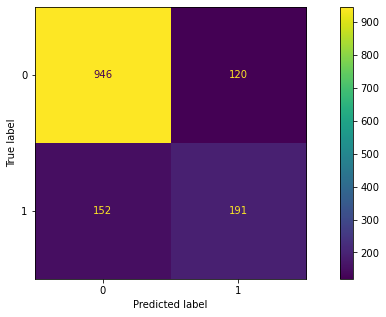

In [113]:
plot_confusion_matrix(logreg_model, X_test, y_test)

plt.show()

In [114]:
TN = cm_lg[0,0]
TP = cm_lg[1,1]
FP = cm_lg[0,1]
FN = cm_lg[1,0]

In [115]:
pr_lg = TP / (TP + FP)
re_lg = TP / (TP + FN)
spec_lg = TN / (TN + FP)
f1_lg = 2 * ((pr_lg * re_lg) / (pr_lg + re_lg))
accuracy_lg = (TN + TP) / (TN + FP + FN + TP)

print('Precision :', pr_lg)
print('\nRecall :', re_lg)
print('\nSpecificity', spec_lg)
print('\nF1_score :', f1_lg)
print('\nAccuracy :', accuracy_lg)

print('\n% of Correctly_Classified_Obs', (TP + TN) / len(y_pred_lg) * 100)
print('\n% of Misclassified_Obs', (FP + FN) / len(y_pred_lg) * 100)

Precision : 0.6141479099678456

Recall : 0.5568513119533528

Specificity 0.8874296435272045

F1_score : 0.5840978593272171

Accuracy : 0.8069552874378992

% of Correctly_Classified_Obs 80.69552874378992

% of Misclassified_Obs 19.30447125621008


### Classification Report

In [116]:
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1066
           1       0.61      0.56      0.58       343

    accuracy                           0.81      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



### ROC Curve

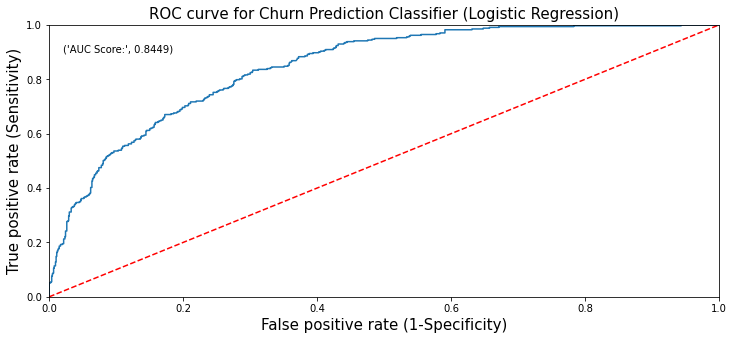

In [117]:
fpr_lg, tpr_lg, threshold_lg = roc_curve(y_test, y_pred_prob_lg)
plt.plot(fpr_lg, tpr_lg)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Churn Prediction Classifier (Logistic Regression)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob_lg),4)))
plt.show()

#### Youden's index

In [118]:
youdens_lg = pd.DataFrame({"TPR":tpr_lg, "FPR":fpr_lg, "Threshold":threshold_lg})

youdens_lg["Difference"] = youdens_lg["TPR"] - youdens_lg["FPR"]

youdens_lg.sort_values("Difference", ascending = False).head()

,TPR,FPR,Threshold,Difference
268,0.83,0.30,0.23,0.53
266,0.83,0.30,0.23,0.52
264,0.83,0.30,0.24,0.52
260,0.82,0.29,0.24,0.52
270,0.84,0.31,0.23,0.52


In [119]:
y_pred_lg_yo = [0 if x < 0.23 else 1 for x in y_pred_prob_lg]

In [120]:
cm_lg_yo = confusion_matrix(y_test, y_pred_lg_yo)

cm_lg_yo

array([[734, 332],
       [ 57, 286]])

In [121]:
TN = cm_lg_yo[0,0]
TP = cm_lg_yo[1,1]
FP = cm_lg_yo[0,1]
FN = cm_lg_yo[1,0]

pr_lg_yo = TP / (TP + FP)
re_lg_yo = TP / (TP + FN)
spec_lg_yo = TN / (TN + FP)
f1_lg_yo = 2 * ((pr_lg_yo * re_lg_yo) / (pr_lg_yo + re_lg_yo))
accuracy_lg_yo = (TN + TP) / (TN + FP + FN + TP)

print('Precision :', pr_lg_yo)
print('\nRecall :', re_lg_yo)
print('\nSpecificity', spec_lg_yo)
print('\nF1_score :', f1_lg_yo)
print('\nAccuracy :', accuracy_lg_yo)

Precision : 0.4627831715210356

Recall : 0.8338192419825073

Specificity 0.6885553470919324

F1_score : 0.595213319458897

Accuracy : 0.7239176721078779


### Classification report (Youden's index)

In [122]:
print(classification_report(y_test, y_pred_lg_yo))

              precision    recall  f1-score   support

           0       0.93      0.69      0.79      1066
           1       0.46      0.83      0.60       343

    accuracy                           0.72      1409
   macro avg       0.70      0.76      0.69      1409
weighted avg       0.81      0.72      0.74      1409



# Logistic Regression Optimization

In [123]:
params = dict(C = [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
              solver = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'])

logreg_opt_model = LogisticRegression(random_state = 1)

logreg_grid = GridSearchCV(logreg_opt_model, params, cv = 5, scoring = 'recall')

logreg_grid = logreg_grid.fit(X_train, y_train)

In [124]:
logreg_grid.best_params_

{'C': 100, 'solver': 'liblinear'}

In [125]:
grid_logreg_model = LogisticRegression(C = logreg_grid.best_params_['C'], 
                               solver = logreg_grid.best_params_['solver'], 
                               random_state = 10)

In [126]:
logreg_grid_model = grid_logreg_model.fit(X_train, y_train)

In [127]:
y_pred_logreg_grid = logreg_grid_model.predict(X_test)

In [128]:
y_pred_prob_logreg_grid = logreg_grid_model.predict_proba(X_test)[:,1]

### Classification report

In [129]:
print(classification_report(y_test, y_pred_logreg_grid))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1066
           1       0.61      0.56      0.58       343

    accuracy                           0.81      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [130]:
cm_logreg_grid = confusion_matrix(y_test, y_pred_logreg_grid)

TN = cm_logreg_grid[0][0]
TP = cm_logreg_grid[1][1]
FP = cm_logreg_grid[0][1]
FN = cm_logreg_grid[1][0]

pr_logreg_grid = TP / (TP + FP)
re_logreg_grid = TP / (TP + FN)
spec_logreg_grid = TN / (TN + FP)
f1_logreg_grid = 2 * ((pr_logreg_grid * re_logreg_grid) / (pr_logreg_grid + re_logreg_grid))
accuracy_logreg_grid = (TN + TP) / (TN + FP + FN + TP)

print('Precision :', pr_logreg_grid)
print('\nRecall :', re_logreg_grid)
print('\nSpecificity', spec_logreg_grid)
print('\nF1_score :', f1_logreg_grid)
print('\nAccuracy :', accuracy_logreg_grid)

Precision : 0.610223642172524

Recall : 0.5568513119533528

Specificity 0.8855534709193246

F1_score : 0.5823170731707317

Accuracy : 0.8055358410220014


### ROC Curve

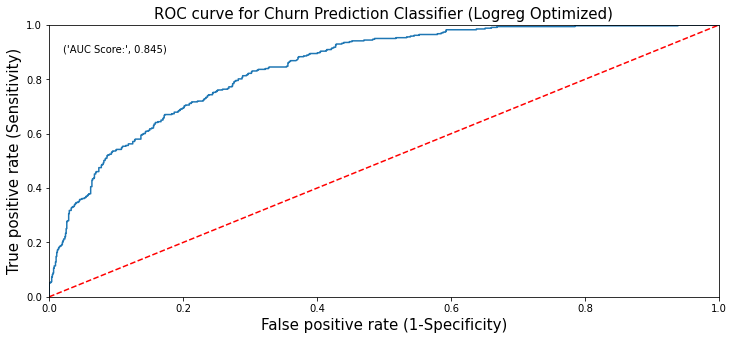

In [131]:
fpr_logreg_grid, tpr_logreg_grid, threshold_logreg_grid = roc_curve(y_test, y_pred_prob_logreg_grid)
plt.plot(fpr_logreg_grid, tpr_logreg_grid)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Churn Prediction Classifier (Logreg Optimized)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob_logreg_grid),4)))
plt.show()

In [132]:
cm_logreg_grid = confusion_matrix(y_test, y_pred_logreg_grid)

cm_logreg_grid

array([[944, 122],
       [152, 191]])

In [133]:
youdens_logreg_grid = pd.DataFrame({"TPR":tpr_logreg_grid, "FPR":fpr_logreg_grid, "Threshold":threshold_logreg_grid})
youdens_logreg_grid["Difference"] = youdens_logreg_grid["TPR"] - youdens_logreg_grid["FPR"]
youdens_logreg_grid.sort_values("Difference", ascending = False).head()

,TPR,FPR,Threshold,Difference
268,0.83,0.30,0.23,0.53
266,0.83,0.30,0.23,0.53
267,0.83,0.30,0.23,0.52
264,0.82,0.30,0.24,0.52
258,0.81,0.29,0.25,0.52


In [134]:
y_pred_logreg_grid_yo = [0 if x < 0.23 else 1 for x in y_pred_prob_logreg_grid]

In [135]:
cm_logreg_grid_yo = confusion_matrix(y_test, y_pred_logreg_grid_yo)

cm_logreg_grid_yo

array([[738, 328],
       [ 58, 285]])

In [136]:
TN = cm_logreg_grid_yo[0][0]
TP = cm_logreg_grid_yo[1][1]
FP = cm_logreg_grid_yo[0][1]
FN = cm_logreg_grid_yo[1][0]

pr_logreg_grid_yo = TP / (TP + FP)
re_logreg_grid_yo = TP / (TP + FN)
spec_logreg_grid_yo = TN / (TN + FP)
f1_logreg_grid_yo = 2 * ((pr_logreg_grid_yo * re_logreg_grid_yo) / (pr_logreg_grid_yo + re_logreg_grid_yo))
accuracy_logreg_grid_yo = (TN + TP) / (TN + FP + FN + TP)

print('Precision :', pr_logreg_grid_yo)
print('\nRecall :', re_logreg_grid_yo)
print('\nSpecificity', spec_logreg_grid_yo)
print('\nF1_score :', f1_logreg_grid_yo)
print('\nAccuracy :', accuracy_logreg_grid_yo)

Precision : 0.46492659053833607

Recall : 0.8309037900874635

Specificity 0.6923076923076923

F1_score : 0.5962343096234309

Accuracy : 0.7260468417317246


In [137]:
print(classification_report(y_test, y_pred_logreg_grid_yo))

              precision    recall  f1-score   support

           0       0.93      0.69      0.79      1066
           1       0.46      0.83      0.60       343

    accuracy                           0.73      1409
   macro avg       0.70      0.76      0.69      1409
weighted avg       0.81      0.73      0.74      1409



# Decision Tree Classifier

### Model

In [138]:
dt = DecisionTreeClassifier()

dt_model = dt.fit(X_train, y_train)

In [139]:
y_pred_dt = dt_model.predict(X_test)

In [140]:
y_pred_prob_dt = dt_model.predict_proba(X_test)[:,1]

### Confusion Matrix

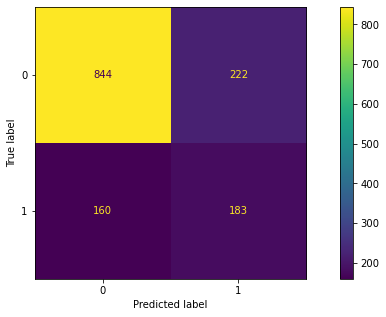

In [141]:
plot_confusion_matrix(dt_model, X_test, y_test)

plt.show()

In [142]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

TN = cm_dt[0][0]
TP = cm_dt[1][1]
FP = cm_dt[0][1]
FN = cm_dt[1][0]

In [143]:
pr_dt = TP / (TP + FP)
re_dt = TP / (TP + FN)
spec_dt = TN / (TN + FP)
f1_dt = 2 * ((pr_dt * re_dt) / (pr_dt + re_dt))
accuracy_dt = (TN + TP) / (TN + FP + FN + TP)

print('Precision :', pr_dt)
print('\nRecall :', re_dt)
print('\nSpecificity', spec_dt)
print('\nF1_score :', f1_dt)
print('\nAccuracy :', accuracy_dt)

print('\n% of Correctly_Classified_Obs', (TP + TN) / len(y_pred_dt) * 100)
print('\n% of Misclassified_Obs', (FP + FN) / len(y_pred_dt) * 100)

Precision : 0.45185185185185184

Recall : 0.5335276967930029

Specificity 0.7917448405253283

F1_score : 0.4893048128342246

Accuracy : 0.7288857345635202

% of Correctly_Classified_Obs 72.88857345635202

% of Misclassified_Obs 27.111426543647976


### Classification Report

In [144]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82      1066
           1       0.45      0.53      0.49       343

    accuracy                           0.73      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.75      0.73      0.74      1409



### ROC Curve

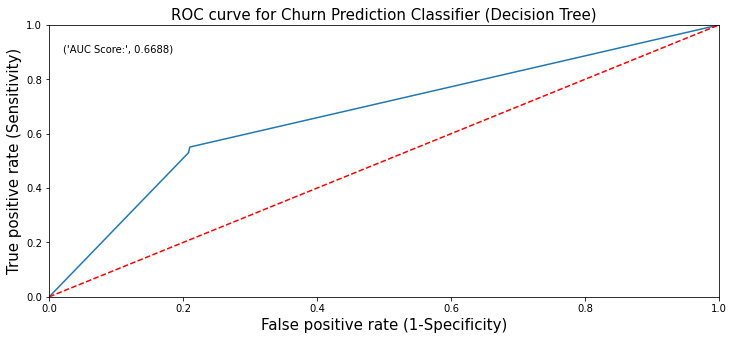

In [145]:
fpr_dt, tpr_dt, threshold_dt = roc_curve(y_test, y_pred_prob_dt)
plt.plot(fpr_dt, tpr_dt)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Churn Prediction Classifier (Decision Tree)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob_dt),4)))
plt.show()

In [146]:
youdens_dt = pd.DataFrame({"TPR":tpr_dt, "FPR":fpr_dt, "Threshold":threshold_dt})
youdens_dt["Difference"] = youdens_dt["TPR"] - youdens_dt["FPR"]
youdens_dt.sort_values("Difference", ascending = False).head()

,TPR,FPR,Threshold,Difference
3,0.55,0.21,0.50,0.34
2,0.53,0.21,0.67,0.33
1,0.53,0.21,1.00,0.32
0,0.00,0.00,2.00,0.00
4,1.00,1.00,0.00,0.00


In [147]:
y_pred_dt_yo = [0 if x < 0.50 else 1 for x in y_pred_prob_dt]

In [148]:
cm_dt_yo = confusion_matrix(y_test, y_pred_dt_yo)

cm_dt_yo

array([[842, 224],
       [154, 189]])

In [149]:
TN = cm_dt_yo[0][0]
TP = cm_dt_yo[1][1]
FP = cm_dt_yo[0][1]
FN = cm_dt_yo[1][0]

pr_dt_yo = TP / (TP + FP)
re_dt_yo = TP / (TP + FN)
spec_dt_yo = TN / (TN + FP)
f1_dt_yo = 2 * ((pr_dt_yo * re_dt_yo) / (pr_dt_yo + re_dt_yo))
accuracy_dt_yo = (TN + TP) / (TN + FP + FN + TP)

print('Precision :', pr_dt_yo)
print('\nRecall :', re_dt_yo)
print('\nSpecificity', spec_dt_yo)
print('\nF1_score :', f1_dt_yo)
print('\nAccuracy :', accuracy_dt_yo)

Precision : 0.4576271186440678

Recall : 0.5510204081632653

Specificity 0.7898686679174484

F1_score : 0.4999999999999999

Accuracy : 0.7317246273953159


In [150]:
print(classification_report(y_test, y_pred_dt_yo))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1066
           1       0.46      0.55      0.50       343

    accuracy                           0.73      1409
   macro avg       0.65      0.67      0.66      1409
weighted avg       0.75      0.73      0.74      1409



## Random Forest Classifier

### Model

In [151]:
rf = RandomForestClassifier()

rf_model = rf.fit(X_train, y_train)

In [152]:
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

array([0, 1, 0, ..., 0, 0, 1])

In [153]:
y_pred_prob_rf = rf_model.predict_proba(X_test)[:,1]

### Confusion Matrix

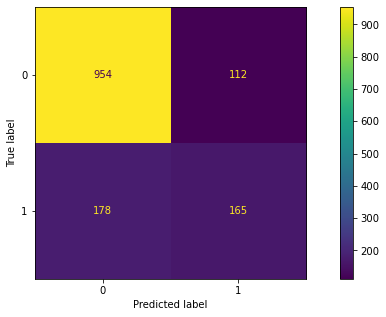

In [154]:
plot_confusion_matrix(rf_model, X_test, y_test)

plt.show()

In [155]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

TN = cm_rf[0][0]
TP = cm_rf[1][1]
FP = cm_rf[0][1]
FN = cm_rf[1][0]

In [156]:
pr_rf = TP / (TP + FP)
re_rf = TP / (TP + FN)
spec_rf = TN / (TN + FP)
f1_rf = 2 * ((pr_rf * re_rf) / (pr_rf + re_rf))
accuracy_rf = (TN + TP) / (TN + FP + FN + TP)

print('Precision :', pr_rf)
print('\nRecall :', re_rf)
print('\nSpecificity', spec_rf)
print('\nF1_score :', f1_rf)
print('\nAccuracy :', accuracy_rf)

print('\n% of Correctly_Classified_Obs', (TP + TN) / len(y_pred_dt) * 100)
print('\n% of Misclassified_Obs', (FP + FN) / len(y_pred_dt) * 100)

Precision : 0.5956678700361011

Recall : 0.48104956268221577

Specificity 0.8949343339587242

F1_score : 0.532258064516129

Accuracy : 0.794180269694819

% of Correctly_Classified_Obs 79.4180269694819

% of Misclassified_Obs 20.581973030518096


### Classification Report

In [157]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1066
           1       0.60      0.48      0.53       343

    accuracy                           0.79      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.78      0.79      0.79      1409



### ROC Curve

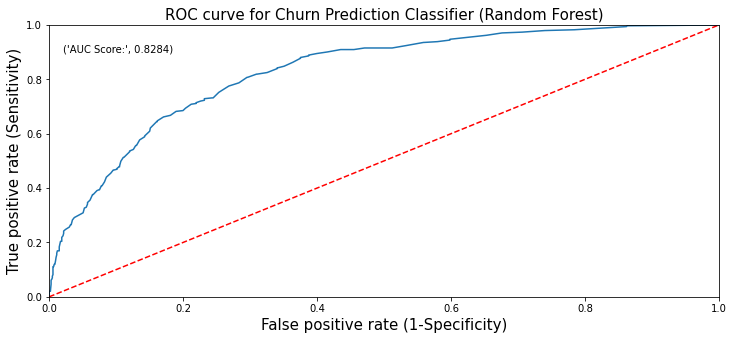

In [158]:
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, y_pred_prob_rf)
plt.plot(fpr_rf, tpr_rf)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Churn Prediction Classifier (Random Forest)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob_rf),4)))
plt.show()

In [159]:
youdens_rf = pd.DataFrame({"TPR":tpr_rf, "FPR":fpr_rf, "Threshold":threshold_rf})
youdens_rf["Difference"] = youdens_rf["TPR"] - youdens_rf["FPR"]
youdens_rf.sort_values("Difference", ascending = False).head()

,TPR,FPR,Threshold,Difference
96,0.81,0.30,0.26,0.51
97,0.81,0.30,0.26,0.51
98,0.82,0.31,0.25,0.51
99,0.82,0.31,0.25,0.51
94,0.78,0.27,0.28,0.51


In [160]:
y_pred_rf_yo = [0 if x < 0.22 else 1 for x in y_pred_prob_rf]

In [161]:
cm_rf_yo = confusion_matrix(y_test, y_pred_rf_yo)

cm_rf_yo

array([[692, 374],
       [ 52, 291]])

In [162]:
TN = cm_rf_yo[0][0]
TP = cm_rf_yo[1][1]
FP = cm_rf_yo[0][1]
FN = cm_rf_yo[1][0]

pr_rf_yo = TP / (TP + FP)
re_rf_yo = TP / (TP + FN)
spec_rf_yo = TN / (TN + FP)
f1_rf_yo = 2 * ((pr_rf_yo * re_rf_yo) / (pr_rf_yo + re_rf_yo))
accuracy_rf_yo = (TN + TP) / (TN + FP + FN + TP)

print('Precision :', pr_rf_yo)
print('\nRecall :', re_rf_yo)
print('\nSpecificity', spec_rf_yo)
print('\nF1_score :', f1_rf_yo)
print('\nAccuracy :', accuracy_rf_yo)

Precision : 0.43759398496240604

Recall : 0.8483965014577259

Specificity 0.649155722326454

F1_score : 0.5773809523809523

Accuracy : 0.6976579134137686


In [163]:
print(classification_report(y_test, y_pred_rf_yo))

              precision    recall  f1-score   support

           0       0.93      0.65      0.76      1066
           1       0.44      0.85      0.58       343

    accuracy                           0.70      1409
   macro avg       0.68      0.75      0.67      1409
weighted avg       0.81      0.70      0.72      1409



## AdaBoost

### Model

In [164]:
ada = AdaBoostClassifier(base_estimator = DecisionTreeClassifier())

ada_model = ada.fit(X_train, y_train)

In [165]:
y_pred_ada = ada_model.predict(X_test)

In [166]:
y_pred_prob_ada = ada_model.predict_proba(X_test)[:,1]

### Confusion Matrix

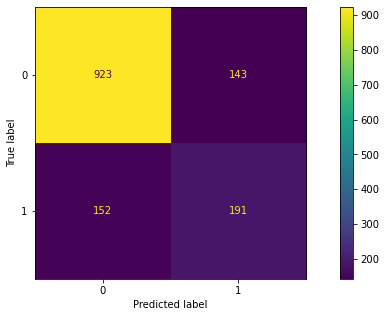

In [167]:
plot_confusion_matrix(ada_model, X_test, y_test)

plt.show()

In [168]:
cm_ada = confusion_matrix(y_test, y_pred_ada)

TN = cm_ada[0][0]
TP = cm_ada[1][1]
FP = cm_ada[0][1]
FN = cm_ada[1][0]

In [169]:
pr_ada = TP / (TP + FP)
re_ada = TP / (TP + FN)
spec_ada = TN / (TN + FP)
f1_ada = 2 * ((pr_ada * re_ada) / (pr_ada + re_ada))
accuracy_ada = (TN + TP) / (TN + FP + FN + TP)

print('Precision :', pr_ada)
print('\nRecall :', re_ada)
print('\nSpecificity', spec_ada)
print('\nF1_score :', f1_ada)
print('\nAccuracy :', accuracy_ada)

print('\n% of Correctly_Classified_Obs', (TP + TN) / len(y_pred_ada) * 100)
print('\n% of Misclassified_Obs', (FP + FN) / len(y_pred_ada) * 100)

Precision : 0.5718562874251497

Recall : 0.5568513119533528

Specificity 0.8658536585365854

F1_score : 0.5642540620384048

Accuracy : 0.7906316536550745

% of Correctly_Classified_Obs 79.06316536550744

% of Misclassified_Obs 20.93683463449255


### Classification Report

In [170]:
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1066
           1       0.57      0.56      0.56       343

    accuracy                           0.79      1409
   macro avg       0.72      0.71      0.71      1409
weighted avg       0.79      0.79      0.79      1409



### ROC Curve

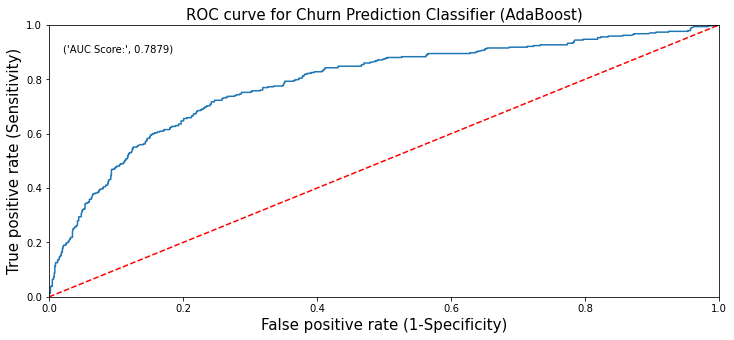

In [171]:
fpr_ada, tpr_ada, threshold_ada = roc_curve(y_test, y_pred_prob_ada)
plt.plot(fpr_ada, tpr_ada)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Churn Prediction Classifier (AdaBoost)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob_ada),4)))
plt.show()

In [172]:
youdens_ada = pd.DataFrame({"TPR":tpr_ada, "FPR":fpr_ada, "Threshold":threshold_ada})

youdens_ada["Difference"] = youdens_ada["TPR"] - youdens_ada["FPR"]
youdens_ada.sort_values("Difference", ascending = False).head()

,TPR,FPR,Threshold,Difference
242,0.72,0.25,0.03,0.48
240,0.72,0.24,0.03,0.48
243,0.72,0.25,0.03,0.47
244,0.72,0.25,0.03,0.47
248,0.73,0.26,0.02,0.47


In [173]:
y_pred_ada_yo = [0 if x < 0.49 else 1 for x in y_pred_prob_ada]

In [174]:
cm_ada_yo = confusion_matrix(y_test, y_pred_ada_yo)

cm_ada_yo

TN = cm_ada_yo[0,0]
TP = cm_ada_yo[1,1]
FP = cm_ada_yo[0,1]
FN = cm_ada_yo[1,0]

pr_ada_yo = TP / (TP + FP)
re_ada_yo = TP / (TP + FN)
spec_ada_yo = TN / (TN + FP)
f1_ada_yo = 2 * ((pr_ada_yo * re_ada_yo) / (pr_ada_yo + re_ada_yo))
accuracy_ada_yo = (TN + TP) / (TN + FP + FN + TP)

print('Precision :', pr_ada_yo)
print('\nRecall :', re_ada_yo)
print('\nSpecificity', spec_ada_yo)
print('\nF1_score :', f1_ada_yo)
print('\nAccuracy :', accuracy_ada_yo)

Precision : 0.5663716814159292

Recall : 0.5597667638483965

Specificity 0.8621013133208255

F1_score : 0.563049853372434

Accuracy : 0.7885024840312278


In [175]:
print(classification_report(y_test, y_pred_ada_yo))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1066
           1       0.57      0.56      0.56       343

    accuracy                           0.79      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.79      0.79      0.79      1409



## Gradient Boost

In [176]:
gboost = GradientBoostingClassifier(n_estimators = 100, random_state = 8)

gboost_model = gboost.fit(X_train, y_train)

In [177]:
y_pred_gb = gboost_model.predict(X_test)

In [178]:
y_pred_prob_gb = gboost_model.predict_proba(X_test)[:,1]

### Confusion Matrix

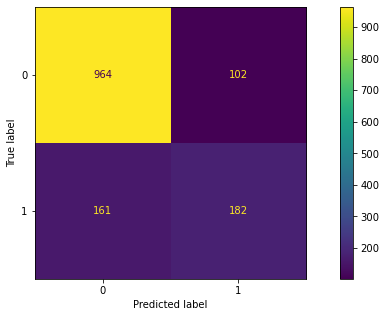

In [179]:
plot_confusion_matrix(gboost_model, X_test, y_test)

plt.show()

In [180]:
cm_gb = confusion_matrix(y_test, y_pred_gb)

TN = cm_gb[0][0]
TP = cm_gb[1][1]
FP = cm_gb[0][1]
FN = cm_gb[1][0]

In [181]:
pr_gb = TP / (TP + FP)
re_gb = TP / (TP + FN)
spec_gb = TN / (TN + FP)
f1_gb = 2 * ((pr_gb * re_gb) / (pr_gb + re_gb))
accuracy_gb = (TN + TP) / (TN + FP + FN + TP)

print('Precision :', pr_gb)
print('\nRecall :', re_gb)
print('\nSpecificity', spec_gb)
print('\nF1_score :', f1_gb)
print('\nAccuracy :', accuracy_gb)

print('\n% of Correctly_Classified_Obs', (TP + TN) / len(y_pred_gb) * 100)
print('\n% of Misclassified_Obs', (FP + FN) / len(y_pred_gb) * 100)

Precision : 0.6408450704225352

Recall : 0.5306122448979592

Specificity 0.9043151969981238

F1_score : 0.5805422647527912

Accuracy : 0.8133427963094393

% of Correctly_Classified_Obs 81.33427963094393

% of Misclassified_Obs 18.665720369056068


### Classification Report

In [182]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1066
           1       0.64      0.53      0.58       343

    accuracy                           0.81      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.81      0.81      1409



### ROC Curve

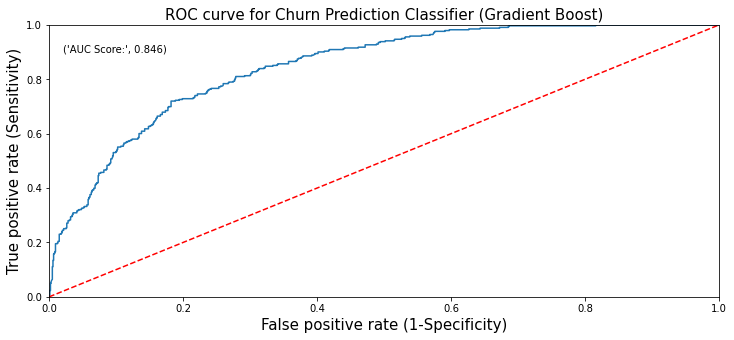

In [183]:
fpr_gb, tpr_gb, threshold_gb = roc_curve(y_test, y_pred_prob_gb)
plt.plot(fpr_gb, tpr_gb)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Churn Prediction Classifier (Gradient Boost)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob_gb),4)))
plt.show()

In [184]:
youdens_gb = pd.DataFrame({"TPR":tpr_gb, "FPR":fpr_gb, "Threshold":threshold_gb})
youdens_gb["Difference"] = youdens_gb["TPR"] - youdens_gb["FPR"]
youdens_gb.sort_values("Difference", ascending = False).head()

,TPR,FPR,Threshold,Difference
192,0.72,0.18,0.35,0.54
194,0.72,0.19,0.34,0.53
238,0.81,0.28,0.25,0.53
196,0.73,0.19,0.33,0.53
193,0.72,0.19,0.34,0.53


In [185]:
y_pred_gb_yo = [0 if x < 0.34 else 1 for x in y_pred_prob_gb]

In [186]:
cm_gb_yo = confusion_matrix(y_test, y_pred_gb_yo)

cm_gb_yo

array([[868, 198],
       [ 96, 247]])

In [187]:
TN = cm_gb_yo[0,0]
TP = cm_gb_yo[1,1]
FP = cm_gb_yo[0,1]
FN = cm_gb_yo[1,0]

pr_gb_yo = TP / (TP + FP)
re_gb_yo = TP / (TP + FN)
spec_gb_yo = TN / (TN + FP)
f1_gb_yo = 2 * ((pr_gb_yo * re_gb_yo) / (pr_gb_yo + re_gb_yo))
accuracy_gb_yo = (TN + TP) / (TN + FP + FN + TP)

print('Precision :', pr_gb_yo)
print('\nRecall :', re_gb_yo)
print('\nSpecificity', spec_gb_yo)
print('\nF1_score :', f1_gb_yo)
print('\nAccuracy :', accuracy_gb_yo)

Precision : 0.5550561797752809

Recall : 0.7201166180758017

Specificity 0.8142589118198874

F1_score : 0.6269035532994924

Accuracy : 0.7913413768630234


In [188]:
print(classification_report(y_test, y_pred_gb_yo))

              precision    recall  f1-score   support

           0       0.90      0.81      0.86      1066
           1       0.56      0.72      0.63       343

    accuracy                           0.79      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.82      0.79      0.80      1409



## XGBoost

In [189]:
xgb = XGBClassifier(learning_rate = 0.01, gamma = 2, eval_metric = 'mlogloss')

xgb_model = xgb.fit(X_train, y_train)

In [190]:
y_pred_xgb = xgb_model.predict(X_test)

In [191]:
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:,1]

### Confusion matrix

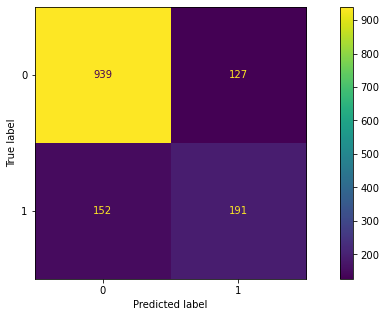

In [192]:
plot_confusion_matrix(xgb_model, X_test, y_test)

plt.show()

In [193]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

TN = cm_xgb[0][0]
TP = cm_xgb[1][1]
FP = cm_xgb[0][1]
FN = cm_xgb[1][0]

In [194]:
pr_xgb = TP / (TP + FP)
re_xgb = TP / (TP + FN)
spec_xgb = TN / (TN + FP)
f1_xgb = 2 * ((pr_xgb * re_xgb) / (pr_xgb + re_xgb))
accuracy_xgb = (TN + TP) / (TN + FP + FN + TP)

print('Precision :', pr_xgb)
print('\nRecall :', re_xgb)
print('\nSpecificity', spec_xgb)
print('\nF1_score :', f1_xgb)
print('\nAccuracy :', accuracy_xgb)

print('\n% of Correctly_Classified_Obs', (TP + TN) / len(y_pred_xgb) * 100)
print('\n% of Misclassified_Obs', (FP + FN) / len(y_pred_xgb) * 100)

Precision : 0.60062893081761

Recall : 0.5568513119533528

Specificity 0.8808630393996247

F1_score : 0.5779122541603631

Accuracy : 0.8019872249822569

% of Correctly_Classified_Obs 80.19872249822569

% of Misclassified_Obs 19.801277501774308


### Classification Report

In [195]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1066
           1       0.60      0.56      0.58       343

    accuracy                           0.80      1409
   macro avg       0.73      0.72      0.72      1409
weighted avg       0.80      0.80      0.80      1409



### ROC Curve

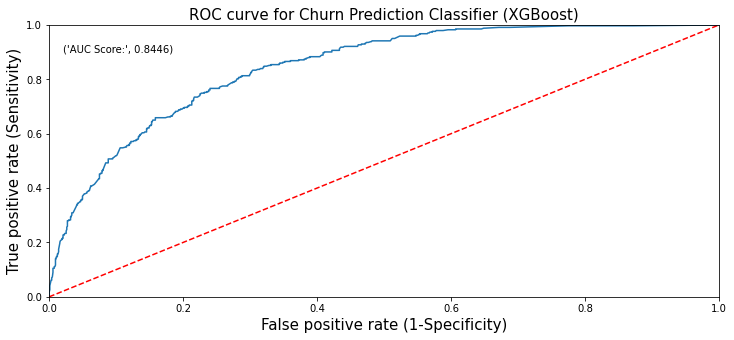

In [196]:
fpr_xgb, tpr_xgb, threshold_xgb = roc_curve(y_test, y_pred_prob_xgb)
plt.plot(fpr_xgb, tpr_xgb)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Churn Prediction Classifier (XGBoost)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob_xgb),4)))
plt.show()

In [197]:
youdens_xgb = pd.DataFrame({"TPR":tpr_xgb, "FPR":fpr_xgb, "Threshold":threshold_xgb})
youdens_xgb["Difference"] = youdens_xgb["TPR"] - youdens_xgb["FPR"]
youdens_xgb.sort_values("Difference", ascending = False).head()

,TPR,FPR,Threshold,Difference
246,0.83,0.30,0.34,0.53
247,0.83,0.31,0.34,0.53
255,0.85,0.32,0.33,0.53
209,0.77,0.24,0.37,0.53
245,0.83,0.30,0.34,0.53


In [198]:
y_pred_xgb_yo = [0 if x < 0.34 else 1 for x in y_pred_prob_xgb]

In [199]:
cm_xgb_yo = confusion_matrix(y_test, y_pred_xgb_yo)

cm_xgb_yo

array([[752, 314],
       [ 64, 279]])

In [200]:
TN = cm_xgb_yo[0,0]
TP = cm_xgb_yo[1,1]
FP = cm_xgb_yo[0,1]
FN = cm_xgb_yo[1,0]

pr_xgb_yo = TP / (TP + FP)
re_xgb_yo = TP / (TP + FN)
spec_xgb_yo = TN / (TN + FP)
f1_xgb_yo = 2 * ((pr_xgb_yo * re_xgb_yo) / (pr_xgb_yo + re_xgb_yo))
accuracy_xgb_yo = (TN + TP) / (TN + FP + FN + TP)

print('Precision :', pr_xgb_yo)
print('\nRecall :', re_xgb_yo)
print('\nSpecificity', spec_xgb_yo)
print('\nF1_score :', f1_xgb_yo)
print('\nAccuracy :', accuracy_xgb_yo)

Precision : 0.47048903878583476

Recall : 0.8134110787172012

Specificity 0.7054409005628518

F1_score : 0.5961538461538461

Accuracy : 0.7317246273953159


In [201]:
print(classification_report(y_test, y_pred_xgb_yo))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1066
           1       0.47      0.81      0.60       343

    accuracy                           0.73      1409
   macro avg       0.70      0.76      0.70      1409
weighted avg       0.81      0.73      0.75      1409



## Naive Bayes

### Model

In [202]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb_model = nb.fit(X_train, y_train)


In [203]:
y_pred_nb = nb_model.predict(X_test)

In [204]:
y_pred_prob_nb = nb_model.predict_proba(X_test)[:,1]

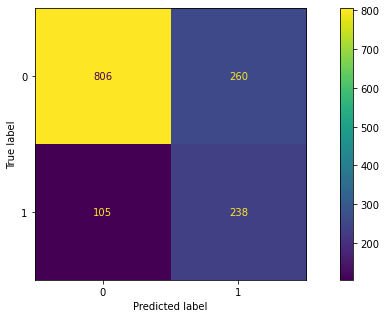

In [205]:
plot_confusion_matrix(nb_model, X_test, y_test)

plt.show()

In [206]:
cm_nb = confusion_matrix(y_test, y_pred_nb)

TN = cm_nb[0][0]
TP = cm_nb[1][1]
FP = cm_nb[0][1]
FN = cm_nb[1][0]

In [207]:
pr_nb = TP / (TP + FP)
re_nb = TP / (TP + FN)
spec_nb = TN / (TN + FP)
f1_nb = 2 * ((pr_nb * re_nb) / (pr_nb + re_nb))
accuracy_nb = (TN + TP) / (TN + FP + FN + TP)

print('Precision :', pr_nb)
print('\nRecall :', re_nb)
print('\nSpecificity', spec_nb)
print('\nF1_score :', f1_nb)
print('\nAccuracy :', accuracy_nb)

print('\n% of Correctly_Classified_Obs', (TP + TN) / len(y_pred_nb) * 100)
print('\n% of Misclassified_Obs', (FP + FN) / len(y_pred_nb) * 100)

Precision : 0.4779116465863454

Recall : 0.6938775510204082

Specificity 0.7560975609756098

F1_score : 0.5659928656361475

Accuracy : 0.7409510290986515

% of Correctly_Classified_Obs 74.09510290986515

% of Misclassified_Obs 25.90489709013485


### ROC Curve

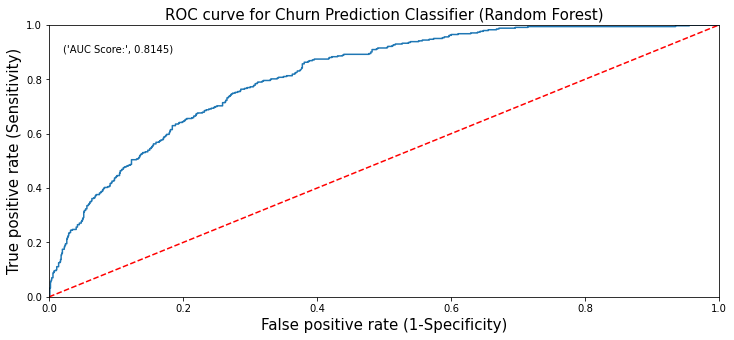

In [208]:
fpr_nb, tpr_nb, threshold_nb = roc_curve(y_test, y_pred_prob_nb)
plt.plot(fpr_nb, tpr_nb)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Churn Prediction Classifier (Random Forest)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob_nb),4)))
plt.show()

In [209]:
youdens_nb = pd.DataFrame({"TPR":tpr_nb, "FPR":fpr_nb, "Threshold":threshold_nb})
youdens_nb["Difference"] = youdens_nb["TPR"] - youdens_nb["FPR"]
youdens_nb.sort_values("Difference", ascending = False).head()

,TPR,FPR,Threshold,Difference
326,0.86,0.38,0.08,0.48
330,0.87,0.39,0.07,0.48
328,0.87,0.39,0.07,0.48
324,0.86,0.38,0.08,0.48
334,0.87,0.40,0.06,0.48


In [210]:
y_pred_nb_yo = [0 if x < 0.08 else 1 for x in y_pred_prob_nb]

In [211]:
cm_nb_yo = confusion_matrix(y_test, y_pred_nb_yo)

cm_nb_yo

array([[660, 406],
       [ 47, 296]])

In [212]:
TN = cm_nb_yo[0][0]
TP = cm_nb_yo[1][1]
FP = cm_nb_yo[0][1]
FN = cm_nb_yo[1][0]

pr_nb_yo = TP / (TP + FP)
re_nb_yo = TP / (TP + FN)
spec_nb_yo = TN / (TN + FP)
f1_nb_yo = 2 * ((pr_nb_yo * re_nb_yo) / (pr_nb_yo + re_nb_yo))
accuracy_nb_yo = (TN + TP) / (TN + FP + FN + TP)

print('Precision :', pr_nb_yo)
print('\nRecall :', re_nb_yo)
print('\nSpecificity', spec_nb_yo)
print('\nF1_score :', f1_nb_yo)
print('\nAccuracy :', accuracy_nb_yo)

Precision : 0.42165242165242167

Recall : 0.8629737609329446

Specificity 0.6191369606003753

F1_score : 0.566507177033493

Accuracy : 0.6784953867991483


In [213]:
print(classification_report(y_test, y_pred_nb_yo))

              precision    recall  f1-score   support

           0       0.93      0.62      0.74      1066
           1       0.42      0.86      0.57       343

    accuracy                           0.68      1409
   macro avg       0.68      0.74      0.66      1409
weighted avg       0.81      0.68      0.70      1409



## Grid Search CV on Decision Tree Classifier

In [214]:
tuned_parameters = {'criterion' : ['entropy', 'gini'], 
                    'max_depth': range(2, 10), 
                    'min_samples_split' : range(2,10),
                    'max_leaf_nodes' : [2, 4]}


In [215]:
dt_model = DecisionTreeClassifier(random_state = 10)

gridsearch = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = tuned_parameters, cv = 10, scoring = 'recall')


In [216]:
dt_grid = gridsearch.fit(X_train, y_train)

In [217]:
dt_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'max_leaf_nodes': 4,
 'min_samples_split': 2}

In [218]:
grid_dt_model = DecisionTreeClassifier(criterion = dt_grid.best_params_['criterion'], 
                                                   max_depth = dt_grid.best_params_['max_depth'], 
                                                   min_samples_split = dt_grid.best_params_['min_samples_split'])

In [219]:
dt_grid_model = grid_dt_model.fit(X_train, y_train)

In [220]:
y_pred_dt_grid = dt_grid_model.predict(X_test)

In [221]:
y_pred_prob_dt_grid = dt_grid_model.predict_proba(X_test)[:,1]

In [222]:
cm_dt_grid = confusion_matrix(y_test, y_pred_dt_grid)

TN = cm_dt_grid[0][0]
TP = cm_dt_grid[1][1]
FP = cm_dt_grid[0][1]
FN = cm_dt_grid[1][0]

pr_dt_grid = TP / (TP + FP)
re_dt_grid = TP / (TP + FN)
spec_dt_grid = TN / (TN + FP)
f1_dt_grid = 2 * ((pr_dt_grid * re_dt_grid) / (pr_dt_grid + re_dt_grid))
accuracy_dt_grid = (TN + TP) / (TN + FP + FN + TP)

print('Precision :', pr_dt_grid)
print('\nRecall :', re_dt_grid)
print('\nSpecificity', spec_dt_grid)
print('\nF1_score :', f1_dt_grid)
print('\nAccuracy :', accuracy_dt_grid)

Precision : 0.46107784431137727

Recall : 0.673469387755102

Specificity 0.7467166979362101

F1_score : 0.5473933649289099

Accuracy : 0.7288857345635202


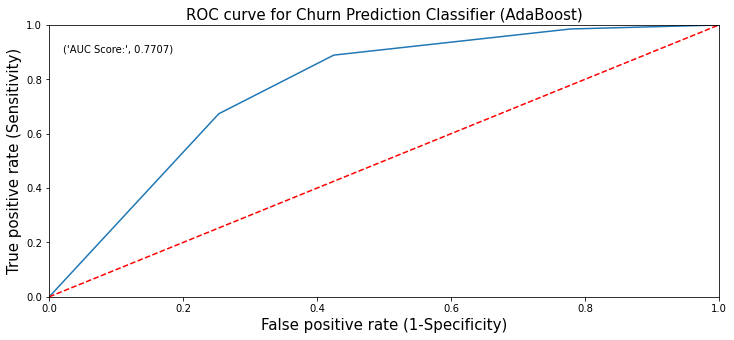

In [223]:
fpr_dt_grid, tpr_dt_grid, threshold_dt_grid = roc_curve(y_test, y_pred_prob_dt_grid)
plt.plot(fpr_dt_grid, tpr_dt_grid)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Churn Prediction Classifier (AdaBoost)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob_dt_grid),4)))
plt.show()

In [224]:
youdens_dt_grid = pd.DataFrame({"TPR":tpr_dt_grid, "FPR":fpr_dt_grid, "Threshold":threshold_dt_grid})
youdens_dt_grid["Difference"] = youdens_dt_grid["TPR"] - youdens_dt_grid["FPR"]
youdens_dt_grid.sort_values("Difference", ascending = False).head()

,TPR,FPR,Threshold,Difference
2,0.89,0.42,0.24,0.46
1,0.67,0.25,0.52,0.42
3,0.99,0.78,0.10,0.21
0,0.00,0.00,1.52,0.00
4,1.00,1.00,0.02,0.00


In [225]:
y_pred_dt_grid_yo = [0 if x < 0.21 else 1 for x in y_pred_prob_dt_grid]

In [226]:
cm_dt_grid_yo = confusion_matrix(y_test, y_pred_dt_grid_yo)

cm_dt_grid_yo



array([[613, 453],
       [ 38, 305]])

In [227]:
TN = cm_dt_grid_yo[0][0]
TP = cm_dt_grid_yo[1][1]
FP = cm_dt_grid_yo[0][1]
FN = cm_dt_grid_yo[1][0]

pr_dt_grid_yo = TP / (TP + FP)
re_dt_grid_yo = TP / (TP + FN)
spec_dt_grid_yo = TN / (TN + FP)
f1_dt_grid_yo = 2 * ((pr_dt_grid_yo * re_dt_grid_yo) / (pr_dt_grid_yo + re_dt_grid_yo))
accuracy_dt_grid_yo = (TN + TP) / (TN + FP + FN + TP)

print('Precision :', pr_dt_grid_yo)
print('\nRecall :', re_dt_grid_yo)
print('\nSpecificity', spec_dt_grid_yo)
print('\nF1_score :', f1_dt_grid_yo)
print('\nAccuracy :', accuracy_dt_grid_yo)

Precision : 0.4023746701846966

Recall : 0.8892128279883382

Specificity 0.575046904315197

F1_score : 0.5540417801998184

Accuracy : 0.6515259048970902


In [228]:
print(classification_report(y_test, y_pred_dt_grid_yo))

              precision    recall  f1-score   support

           0       0.94      0.58      0.71      1066
           1       0.40      0.89      0.55       343

    accuracy                           0.65      1409
   macro avg       0.67      0.73      0.63      1409
weighted avg       0.81      0.65      0.68      1409



## Grid Search CV on Random Forest Classifier

In [229]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'max_depth': [5, 6, 7],
                     'max_leaf_nodes' : [2, 4],
                     'min_samples_split': [2, 5, 8]}]

In [230]:
rf_model = RandomForestClassifier(random_state = 10)

gridsearchrf = GridSearchCV(estimator = RandomForestClassifier(), param_grid = tuned_parameters, cv = 10, scoring = 'recall')

In [231]:
rf_grid = gridsearchrf.fit(X_train, y_train)

In [232]:
rf_grid.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_leaf_nodes': 4,
 'min_samples_split': 9}

In [233]:
grid_rf_model = RandomForestClassifier(criterion = rf_grid.best_params_['criterion'], 
                                                   max_depth = rf_grid.best_params_['max_depth'], 
                                                   max_leaf_nodes = rf_grid.best_params_['max_leaf_nodes'],
                                                   min_samples_split = rf_grid.best_params_['min_samples_split'])

In [234]:
rf_grid_model = grid_rf_model.fit(X_train, y_train)

In [235]:
y_pred_rf_grid = rf_grid_model.predict(X_test)

In [236]:
y_pred_prob_rf_grid = rf_grid_model.predict_proba(X_test)[:,1]

In [237]:
cm_rf_grid = confusion_matrix(y_test, y_pred_rf_grid)

cm_rf_grid

array([[1017,   49],
       [ 239,  104]])

In [238]:
TN = cm_rf_grid[0][0]
TP = cm_rf_grid[1][1]
FP = cm_rf_grid[0][1]
FN = cm_rf_grid[1][0]

pr_rf_grid = TP / (TP + FP)
re_rf_grid = TP / (TP + FN)
spec_rf_grid = TN / (TN + FP)
f1_rf_grid = 2 * ((pr_rf_grid * re_rf_grid) / (pr_rf_grid + re_rf_grid))
accuracy_rf_grid = (TN + TP) / (TN + FP + FN + TP)

print('Precision :', pr_rf_grid)
print('\nRecall :', re_rf_grid)
print('\nSpecificity', spec_rf_grid)
print('\nF1_score :', f1_rf_grid)
print('\nAccuracy :', accuracy_rf_grid)

Precision : 0.6797385620915033

Recall : 0.3032069970845481

Specificity 0.9540337711069419

F1_score : 0.41935483870967744

Accuracy : 0.7955997161107168


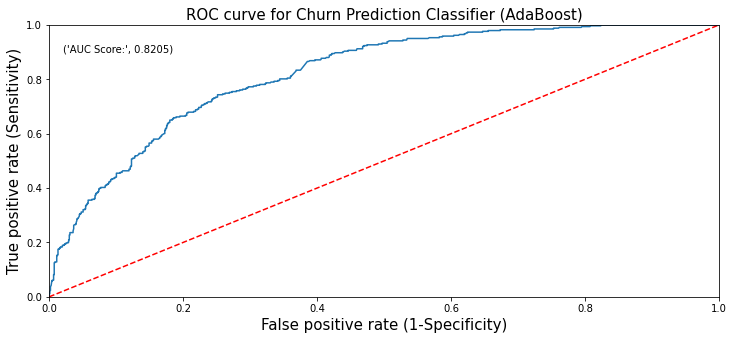

In [239]:
fpr_rf_grid, tpr_rf_grid, threshold_rf_grid = roc_curve(y_test, y_pred_prob_rf_grid)
plt.plot(fpr_rf_grid, tpr_rf_grid)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Churn Prediction Classifier (AdaBoost)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob_rf_grid),4)))
plt.show()

In [240]:
youdens_rf_grid = pd.DataFrame({"TPR":tpr_rf_grid, "FPR":fpr_rf_grid, "Threshold":threshold_rf_grid})
youdens_rf_grid["Difference"] = youdens_rf_grid["TPR"] - youdens_rf_grid["FPR"]
youdens_rf_grid.sort_values("Difference", ascending = False).head()

,TPR,FPR,Threshold,Difference
259,0.74,0.25,0.31,0.49
261,0.75,0.26,0.31,0.49
263,0.75,0.26,0.31,0.49
257,0.73,0.25,0.32,0.49
255,0.73,0.25,0.32,0.49


In [241]:
y_pred_rf_grid_yo = [0 if x < 0.30 else 1 for x in y_pred_prob_rf_grid]

In [242]:
cm_rf_grid_yo = confusion_matrix(y_test, y_pred_rf_grid_yo)

cm_rf_grid_yo

array([[771, 295],
       [ 84, 259]])

In [243]:
TN = cm_rf_grid_yo[0][0]
TP = cm_rf_grid_yo[1][1]
FP = cm_rf_grid_yo[0][1]
FN = cm_rf_grid_yo[1][0]

pr_rf_grid_yo = TP / (TP + FP)
re_rf_grid_yo = TP / (TP + FN)
spec_rf_grid_yo = TN / (TN + FP)
f1_rf_grid_yo = 2 * ((pr_rf_grid_yo * re_rf_grid_yo) / (pr_rf_grid_yo + re_rf_grid_yo))
accuracy_rf_grid_yo = (TN + TP) / (TN + FP + FN + TP)

print('Precision :', pr_rf_grid_yo)
print('\nRecall :', re_rf_grid_yo)
print('\nSpecificity', spec_rf_grid_yo)
print('\nF1_score :', f1_rf_grid_yo)
print('\nAccuracy :', accuracy_rf_grid_yo)

Precision : 0.4675090252707581

Recall : 0.7551020408163265

Specificity 0.723264540337711

F1_score : 0.5774804905239688

Accuracy : 0.7310149041873669


In [244]:
print(classification_report(y_test, y_pred_rf_grid_yo))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1066
           1       0.47      0.76      0.58       343

    accuracy                           0.73      1409
   macro avg       0.68      0.74      0.69      1409
weighted avg       0.80      0.73      0.75      1409



## Grid Search CV on AdaBoost

In [245]:
tuned_parameters = [{'n_estimators': [100, 120, 150, 200, 250],
                     'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015]}]

In [246]:
ada_model = AdaBoostClassifier(random_state = 10)

gridsearch = GridSearchCV(estimator = ada_model, param_grid = tuned_parameters, cv = 10, scoring = 'recall')

In [247]:
ada_grid = gridsearch.fit(X_train, y_train)

In [248]:
ada_grid.best_params_

{'learning_rate': 0.15, 'n_estimators': 200}

In [249]:
grid_ada_model = AdaBoostClassifier(learning_rate = ada_grid.best_params_['learning_rate'], 
                               n_estimators = ada_grid.best_params_['n_estimators'], 
                               random_state = 10)


In [250]:
ada_grid_model = grid_ada_model.fit(X_train, y_train)

In [251]:
y_pred_ada_grid = ada_grid_model.predict(X_test)

In [252]:
y_pred_prob_ada_grid = ada_grid_model.predict_proba(X_test)[:,1]

### Classification report

In [253]:
print(classification_report(y_test, y_pred_ada_grid))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1066
           1       0.63      0.55      0.59       343

    accuracy                           0.81      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.81      0.81      1409



In [254]:
cm_ada_grid = confusion_matrix(y_test, y_pred_ada_grid)

TN = cm_ada_grid[0][0]
TP = cm_ada_grid[1][1]
FP = cm_ada_grid[0][1]
FN = cm_ada_grid[1][0]

pr_ada_grid = TP / (TP + FP)
re_ada_grid = TP / (TP + FN)
spec_ada_grid = TN / (TN + FP)
f1_ada_grid = 2 * ((pr_ada_grid * re_ada_grid) / (pr_ada_grid + re_ada_grid))
accuracy_ada_grid = (TN + TP) / (TN + FP + FN + TP)

print('Precision :', pr_ada_grid)
print('\nRecall :', re_ada_grid)
print('\nSpecificity', spec_ada_grid)
print('\nF1_score :', f1_ada_grid)
print('\nAccuracy :', accuracy_ada_grid)

Precision : 0.6338983050847458

Recall : 0.5451895043731778

Specificity 0.8986866791744841

F1_score : 0.5862068965517241

Accuracy : 0.8126330731014905


### ROC Curve

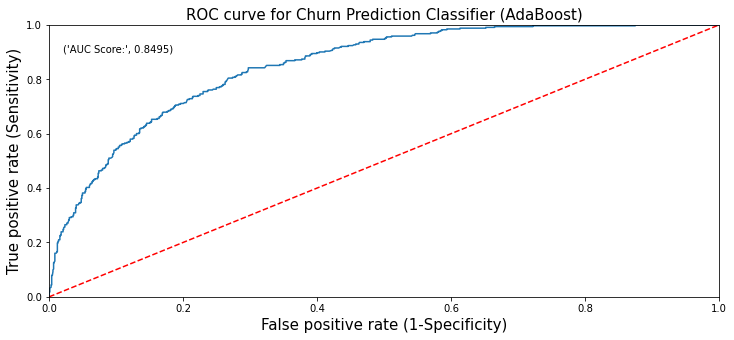

In [255]:
fpr_ada_grid, tpr_ada_grid, threshold_ada_grid = roc_curve(y_test, y_pred_prob_ada_grid)
plt.plot(fpr_ada_grid, tpr_ada_grid)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Churn Prediction Classifier (AdaBoost)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob_ada_grid),4)))
plt.show()

In [256]:
cm_ada_grid = confusion_matrix(y_test, y_pred_ada_grid)

cm_ada_grid

array([[958, 108],
       [156, 187]])

In [257]:
youdens_ada_grid = pd.DataFrame({"TPR":tpr_ada_grid, "FPR":fpr_ada_grid, "Threshold":threshold_ada_grid})
youdens_ada_grid["Difference"] = youdens_ada_grid["TPR"] - youdens_ada_grid["FPR"]
youdens_ada_grid.sort_values("Difference", ascending = False).head()

,TPR,FPR,Threshold,Difference
278,0.84,0.30,0.49,0.55
277,0.84,0.30,0.49,0.54
259,0.80,0.27,0.49,0.54
272,0.83,0.29,0.49,0.54
268,0.82,0.28,0.49,0.53


In [258]:
y_pred_ada_grid_yo = [0 if x < 0.486 else 1 for x in y_pred_prob_ada_grid]

In [259]:
cm_ada_grid_yo = confusion_matrix(y_test, y_pred_ada_grid_yo)

cm_ada_grid_yo

array([[626, 440],
       [ 33, 310]])

In [260]:
TN = cm_ada_grid_yo[0][0]
TP = cm_ada_grid_yo[1][1]
FP = cm_ada_grid_yo[0][1]
FN = cm_ada_grid_yo[1][0]

pr_ada_grid_yo = TP / (TP + FP)
re_ada_grid_yo = TP / (TP + FN)
spec_ada_grid_yo = TN / (TN + FP)
f1_ada_grid_yo = 2 * ((pr_ada_grid_yo * re_ada_grid_yo) / (pr_ada_grid_yo + re_ada_grid_yo))
accuracy_ada_grid_yo = (TN + TP) / (TN + FP + FN + TP)

print('Precision :', pr_ada_grid_yo)
print('\nRecall :', re_ada_grid_yo)
print('\nSpecificity', spec_ada_grid_yo)
print('\nF1_score :', f1_ada_grid_yo)
print('\nAccuracy :', accuracy_ada_grid_yo)

Precision : 0.41333333333333333

Recall : 0.9037900874635568

Specificity 0.5872420262664165

F1_score : 0.5672461116193961

Accuracy : 0.6643009226401704


In [261]:
print(classification_report(y_test, y_pred_ada_grid_yo))

              precision    recall  f1-score   support

           0       0.95      0.59      0.73      1066
           1       0.41      0.90      0.57       343

    accuracy                           0.66      1409
   macro avg       0.68      0.75      0.65      1409
weighted avg       0.82      0.66      0.69      1409



## Grid Search CV on GradientBoost

In [262]:
tuned_parameters = {"n_estimators" : [100, 120, 150],
   "learning_rate" : [0.1, 0.01, 0.001, 0.15, 0.015],
         "max_depth": [2, 3, 4, 5, 6]}

In [263]:
gboost_model = GradientBoostingClassifier(random_state = 10)

gridsearch = GridSearchCV(estimator = gboost_model, param_grid = tuned_parameters, cv = 10, scoring = 'recall')

In [264]:
gb_grid = gridsearch.fit(X_train, y_train)

In [265]:
gb_grid.best_params_

{'learning_rate': 0.15, 'max_depth': 2, 'n_estimators': 120}

In [266]:
grid_gb_model = GradientBoostingClassifier(learning_rate = gb_grid.best_params_['learning_rate'], 
                               n_estimators = gb_grid.best_params_['n_estimators'], 
                               random_state = 10)


In [267]:
grid_gb_model = grid_gb_model.fit(X_train, y_train)

In [268]:
y_pred_gb_grid = grid_gb_model.predict(X_test)

In [269]:
y_pred_prob_gb_grid = grid_gb_model.predict_proba(X_test)[:,1]

In [270]:
cm_gb_grid = confusion_matrix(y_test, y_pred_gb_grid)

TN = cm_gb_grid[0][0]
TP = cm_gb_grid[1][1]
FP = cm_gb_grid[0][1]
FN = cm_gb_grid[1][0]

pr_gb_grid = TP / (TP + FP)
re_gb_grid = TP / (TP + FN)
spec_gb_grid = TN / (TN + FP)
f1_gb_grid = 2 * ((pr_gb_grid * re_gb_grid) / (pr_gb_grid + re_gb_grid))
accuracy_gb_grid = (TN + TP) / (TN + FP + FN + TP)

print('Precision :', pr_gb_grid)
print('\nRecall :', re_gb_grid)
print('\nSpecificity', spec_gb_grid)
print('\nF1_score :', f1_gb_grid)
print('\nAccuracy :', accuracy_gb_grid)

Precision : 0.6293706293706294

Recall : 0.5247813411078717

Specificity 0.900562851782364

F1_score : 0.5723370429252782

Accuracy : 0.8090844570617459


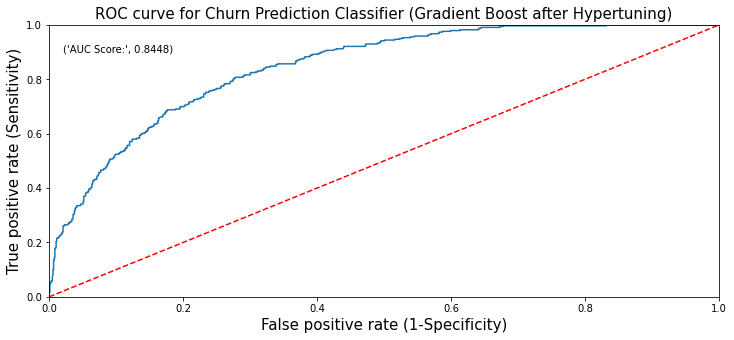

In [271]:
fpr_gb_grid, tpr_gb_grid, threshold_gb_grid = roc_curve(y_test, y_pred_prob_gb_grid)
plt.plot(fpr_gb_grid, tpr_gb_grid)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Churn Prediction Classifier (Gradient Boost after Hypertuning)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob_gb_grid),4)))
plt.show()

In [272]:
youdens_gb_grid = pd.DataFrame({"TPR":tpr_gb_grid, "FPR":fpr_gb_grid, "Threshold":threshold_gb_grid})
youdens_gb_grid["Difference"] = youdens_gb_grid["TPR"] - youdens_gb_grid["FPR"]
youdens_gb_grid.sort_values("Difference", ascending = False).head()

,TPR,FPR,Threshold,Difference
261,0.81,0.28,0.24,0.53
259,0.80,0.28,0.24,0.53
260,0.80,0.28,0.24,0.53
257,0.80,0.27,0.24,0.53
258,0.80,0.28,0.24,0.53


In [273]:
y_pred_gb_grid_yo = [0 if x < 0.34 else 1 for x in y_pred_prob_gb_grid]

In [274]:
cm_gb_grid_yo = confusion_matrix(y_test, y_pred_gb_grid_yo)

cm_gb_grid_yo

array([[857, 209],
       [104, 239]])

In [275]:
TN = cm_gb_grid_yo[0][0]
TP = cm_gb_grid_yo[1][1]
FP = cm_gb_grid_yo[0][1]
FN = cm_gb_grid_yo[1][0]

pr_gb_grid_yo = TP / (TP + FP)
re_gb_grid_yo = TP / (TP + FN)
spec_gb_grid_yo = TN / (TN + FP)
f1_gb_grid_yo = 2 * ((pr_gb_grid_yo * re_gb_grid_yo) / (pr_gb_grid_yo + re_gb_grid_yo))
accuracy_gb_grid_yo = (TN + TP) / (TN + FP + FN + TP)

print('Precision :', pr_gb_grid_yo)
print('\nRecall :', re_gb_grid_yo)
print('\nSpecificity', spec_gb_grid_yo)
print('\nF1_score :', f1_gb_grid_yo)
print('\nAccuracy :', accuracy_gb_grid_yo)

Precision : 0.5334821428571429

Recall : 0.6967930029154519

Specificity 0.8039399624765479

F1_score : 0.6042983565107459

Accuracy : 0.7778566359119943


In [276]:
print(classification_report(y_test, y_pred_gb_grid_yo))

              precision    recall  f1-score   support

           0       0.89      0.80      0.85      1066
           1       0.53      0.70      0.60       343

    accuracy                           0.78      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.80      0.78      0.79      1409



## Grid Search CV on XGBoost

In [277]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}

xgb_model = XGBClassifier(random_state = 0, eval_metric = 'mlogloss')

xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'recall')

xgb_grid.fit(X_train, y_train)

print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'gamma': 3, 'learning_rate': 0.6, 'max_depth': 3} 



In [278]:
grid_xgb_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'), eval_metric = 'mlogloss')

grid_xgb_model = grid_xgb_model.fit(X_train, y_train)

In [279]:
y_pred_xgb_grid = grid_xgb_model.predict(X_test)

In [280]:
y_pred_prob_xgb_grid = grid_xgb_model.predict_proba(X_test)[:,1]

In [281]:
cm_xgb_grid = confusion_matrix(y_test, y_pred_xgb_grid)

TN = cm_xgb_grid[0][0]
TP = cm_xgb_grid[1][1]
FP = cm_xgb_grid[0][1]
FN = cm_xgb_grid[1][0]

pr_xgb_grid = TP / (TP + FP)
re_xgb_grid = TP / (TP + FN)
spec_xgb_grid = TN / (TN + FP)
f1_xgb_grid = 2 * ((pr_xgb_grid * re_xgb_grid) / (pr_xgb_grid + re_xgb_grid))
accuracy_xgb_grid = (TN + TP) / (TN + FP + FN + TP)

print('Precision :', pr_xgb_grid)
print('\nRecall :', re_xgb_grid)
print('\nSpecificity', spec_xgb_grid)
print('\nF1_score :', f1_xgb_grid)
print('\nAccuracy :', accuracy_xgb_grid)

Precision : 0.6133333333333333

Recall : 0.5364431486880467

Specificity 0.8911819887429644

F1_score : 0.5723172628304821

Accuracy : 0.8048261178140526


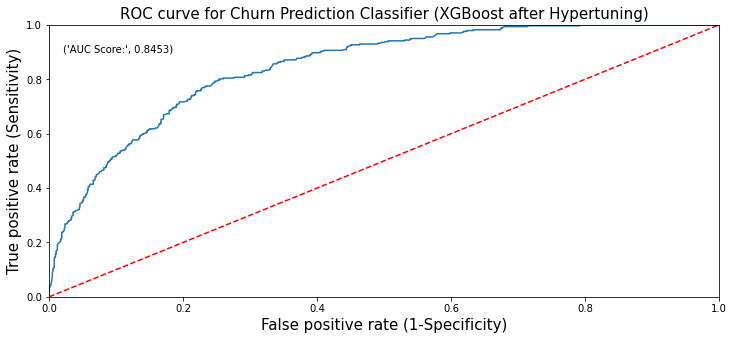

In [282]:
fpr_xgb_grid, tpr_xgb_grid, threshold_xgb_grid = roc_curve(y_test, y_pred_prob_xgb_grid)
plt.plot(fpr_xgb_grid, tpr_xgb_grid)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Churn Prediction Classifier (XGBoost after Hypertuning)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob_xgb_grid),4)))
plt.show()

In [283]:
youdens_xgb_grid = pd.DataFrame({"TPR":tpr_xgb_grid, "FPR":fpr_xgb_grid, "Threshold":threshold_xgb_grid})
youdens_xgb_grid["Difference"] = youdens_xgb_grid["TPR"] - youdens_xgb_grid["FPR"]
youdens_xgb_grid.sort_values("Difference", ascending = False).head()

,TPR,FPR,Threshold,Difference
261,0.80,0.25,0.28,0.55
259,0.80,0.25,0.28,0.55
255,0.79,0.25,0.29,0.55
263,0.80,0.26,0.27,0.54
260,0.80,0.25,0.28,0.54


In [284]:
y_pred_xgb_grid_yo = [0 if x < 0.27 else 1 for x in y_pred_prob_xgb_grid]

In [285]:
cm_xgb_grid_yo = confusion_matrix(y_test, y_pred_xgb_grid_yo)

cm_xgb_grid_yo

array([[788, 278],
       [ 67, 276]])

In [286]:
TN = cm_xgb_grid_yo[0][0]
TP = cm_xgb_grid_yo[1][1]
FP = cm_xgb_grid_yo[0][1]
FN = cm_xgb_grid_yo[1][0]

pr_xgb_grid_yo = TP / (TP + FP)
re_xgb_grid_yo = TP / (TP + FN)
spec_xgb_grid_yo = TN / (TN + FP)
f1_xgb_grid_yo = 2 * ((pr_xgb_grid_yo * re_xgb_grid_yo) / (pr_xgb_grid_yo + re_xgb_grid_yo))
accuracy_xgb_grid_yo = (TN + TP) / (TN + FP + FN + TP)

print('Precision :', pr_xgb_grid_yo)
print('\nRecall :', re_xgb_grid_yo)
print('\nSpecificity', spec_xgb_grid_yo)
print('\nF1_score :', f1_xgb_grid_yo)
print('\nAccuracy :', accuracy_xgb_grid_yo)

Precision : 0.4981949458483754

Recall : 0.8046647230320699

Specificity 0.7392120075046904

F1_score : 0.6153846153846153

Accuracy : 0.7551454932576295


In [287]:
print(classification_report(y_test, y_pred_xgb_grid_yo))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1066
           1       0.50      0.80      0.62       343

    accuracy                           0.76      1409
   macro avg       0.71      0.77      0.72      1409
weighted avg       0.82      0.76      0.77      1409



## Performance Metrics Report

In [288]:
data = {"Model" : ["Logistic Reg", "Decision Tree", "Random Forest", "AdaBoost", "Gradient Boost", "XGBoost",
                   "Naive Bayes", "Logistic Reg Grid", "Decision Tree Grid", "Random Forest Grid", 
                   "AdaBoost Grid", "Gradient Boost Grid", "XGBoost Grid"],
        
        "Precision" : [pr_lg, pr_dt, pr_rf, pr_ada, pr_gb, pr_xgb, pr_nb, pr_logreg_grid, pr_dt_grid,
                       pr_rf_grid, pr_ada_grid, pr_gb_grid, pr_xgb_grid],
        
        "Recall" : [re_lg, re_dt, re_rf, re_ada, re_gb, re_xgb, re_nb, re_logreg_grid, re_dt_grid, 
                    re_rf_grid, re_ada_grid, re_gb_grid, re_xgb_grid],
        
        "F1-Score" : [f1_lg, f1_dt, f1_rf, f1_ada, f1_gb, f1_xgb, f1_nb, f1_logreg_grid, f1_dt_grid,
                      f1_rf_grid, f1_ada_grid, f1_gb_grid, f1_xgb_grid],
        
        "Accuracy" : [accuracy_lg, accuracy_dt, accuracy_rf, accuracy_ada, accuracy_gb, accuracy_xgb,
                      accuracy_nb, accuracy_logreg_grid, accuracy_dt_grid, accuracy_rf_grid, 
                      accuracy_ada_grid, accuracy_gb_grid, accuracy_xgb_grid], 
        
        "Precision New" : [pr_lg_yo, pr_dt_yo, pr_rf_yo, pr_ada_yo, pr_gb_yo, pr_xgb_yo, pr_nb_yo, 
                           pr_logreg_grid_yo, pr_dt_grid_yo, pr_rf_grid_yo, pr_ada_grid_yo, pr_gb_grid_yo,
                           pr_xgb_grid_yo], 
        
        "Recall New" : [re_lg_yo, re_dt_yo, re_rf_yo, re_ada_yo, re_gb_yo, re_xgb_yo, re_nb_yo, 
                        re_logreg_grid_yo, re_dt_grid_yo, re_rf_grid_yo, re_ada_grid_yo, re_gb_grid_yo,
                        re_xgb_grid_yo], 
        
        "F1-Score New" : [f1_lg_yo, f1_dt_yo, f1_rf_yo, f1_ada_yo, f1_gb_yo, f1_xgb_yo, f1_nb_yo, 
                          f1_logreg_grid_yo, f1_dt_grid_yo, f1_rf_grid_yo, f1_ada_grid_yo, f1_gb_grid_yo,
                          f1_xgb_grid_yo], 
        
        "Accuracy New" : [accuracy_lg_yo, accuracy_dt_yo, accuracy_rf_yo, accuracy_ada_yo, accuracy_gb_yo,
                          accuracy_xgb_yo, accuracy_nb_yo, accuracy_logreg_grid_yo, accuracy_dt_grid_yo, 
                          accuracy_rf_grid_yo, accuracy_ada_grid_yo,
                          accuracy_gb_grid_yo, accuracy_xgb_grid_yo]}

report = pd.DataFrame(data).sort_values(by = 'Recall New', ascending = False)

report = report.set_index("Model")

report

,Precision,Recall,F1-Score,Accuracy,Precision New,Recall New,F1-Score New,Accuracy New
Model,,,,,,,,
AdaBoost Grid,0.63,0.55,0.59,0.81,0.41,0.90,0.57,0.66
Decision Tree Grid,0.46,0.67,0.55,0.73,0.40,0.89,0.55,0.65
Naive Bayes,0.48,0.69,0.57,0.74,0.42,0.86,0.57,0.68
Random Forest,0.60,0.48,0.53,0.79,0.44,0.85,0.58,0.70
Logistic Reg,0.61,0.56,0.58,0.81,0.46,0.83,0.60,0.72
Logistic Reg Grid,0.61,0.56,0.58,0.81,0.46,0.83,0.60,0.73
XGBoost,0.60,0.56,0.58,0.80,0.47,0.81,0.60,0.73
XGBoost Grid,0.61,0.54,0.57,0.80,0.50,0.80,0.62,0.76
Random Forest Grid,0.68,0.30,0.42,0.80,0.47,0.76,0.58,0.73


## Feature Importance

In [289]:
important_features = pd.DataFrame({'Features' : X_train.columns, 
                                   'Importance' : ada_grid_model.feature_importances_})

features = important_features.sort_values(by = 'Importance', ascending = False)

features

,Features,Importance
17,MonthlyCharges,0.23
18,TotalCharges,0.23
16,tenure,0.19
15,PaymentMethod,0.10
13,Contract,0.06
5,MultipleLines,0.04
4,PhoneService,0.03
1,SeniorCitizen,0.03
14,PaperlessBilling,0.03
6,InternetService,0.02


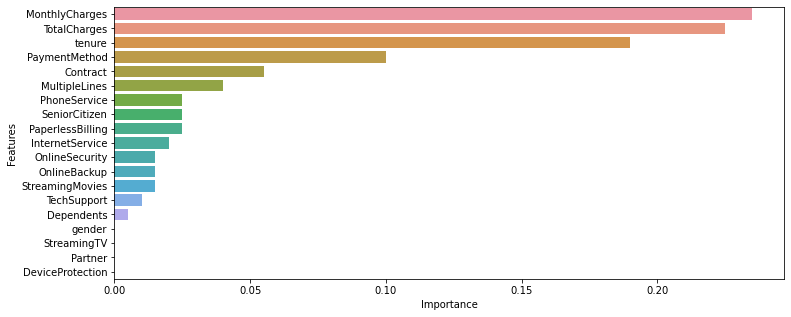

In [290]:
sns.barplot(x = 'Importance', y = 'Features', data = features)
plt.show()